In [1]:
import tracemalloc
import traceback

from utils_v1 import *


In [2]:
from icecream import ic

import numpy as np
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates, PatchesHandlerEvidential

from src.trainer.evidential import TrainerEvidential
from src.trainer.multioutput import TrainerMCDropout, TrainerSingleRun
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cv2
from src import metrics as _metric
import json
import pickle 
import src.trainer.evidential as evidential
from src.backend.Logger import Logger



In [3]:
'''
if config["training"] == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if config["training"] == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''

site = 'PA'
# mode = 'mcd' # evidential, mcd, single_run
mode = 'single_run'

if mode == 'evidential':
	training = False
elif mode == 'mcd':
	training = False
elif mode == 'single_run':
	training = False
else:
	training = False
print("Mode: {}. Site: {}. Training: {}".format(mode, site, training))


Mode: single_run. Site: PA. Training: False


In [4]:

if site == 'PA':
	#dates = [2018, 2019]
	dates = [2018, 2019]

	dataset = PAMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
		addPastDeforestationInput = True,
		borderBuffer = 2)			

	if mode == 'evidential':
		#exp_id_base = 148
		# exp_id_base = 155
		exp_id_base = 194
		exp_id_base = 198
		exp_id_base = 214

		# earlier date
		exp_id_base = 224
		exp_id_base = 194
	elif mode == 'mcd' or mode == 'single_run':
		exp_ids = [103, 104, 105, 106, 107, 118, 119, 120, 121, 122]

else:
	
	dates = [2019, 2020]

	dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
		addPastDeforestationInput = True,
		borderBuffer = 2)	
	
	if mode == 'evidential':
		# MT
		exp_id_base = 196
	elif mode == 'mcd' or mode == 'single_run':
		exp_ids = [108, 109, 110, 111, 112, 113, 114, 115, 116, 117]

ic(dates)

if issubclass(type(dataset), MultipleDates):
	if mode == 'evidential':
		patchesHandler = PatchesHandlerEvidential(
			dataset)
	else:
		patchesHandler = PatchesHandlerMultipleDates(
			dataset)
		
else:
	patchesHandler = PatchesHandler()



ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| dates: [2018, 2019]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [5]:
# from enum import Enum
# UncertaintyMethod = Enum('Predictor', 'pred_var MI pred_entropy KL pred_entropy_single evidential')

In [6]:
config = {
    "training": training,
    "learning_rate": 1e-4,
    "weights": [0.1, 0.9, 0],
    "save_probabilities": False,
    "loadInference": False,
    "addPastDeforestationInput": True,
    "Uncertainty": {},
    "uncertainty_method": "",
    "evidence_function": evidential.relu_evidence
    }
if mode == 'evidential':
    config["inference_times"] = 1
    config['Uncertainty']['annealing_step'] = 10*375
    config['evidence_function'] = evidential.relu_evidence
    trainer_class = TrainerEvidential
    config['uncertainty_method'] = "evidential"
    config['classes_mode'] = None

    repetition_n = 10
    experiment_values = np.ones(repetition_n).astype(np.uint8)

    # experiment_values = [int(x) for x in experiment_values]

    exp_ids = range(exp_id_base, exp_id_base+len(experiment_values))

elif mode == 'mcd':
    config["inference_times"] = 10
    trainer_class = TrainerMCDropout
    config['uncertainty_method'] = "pred_entropy"
    config['classes_mode'] = True

elif mode == 'single_run':
    config["inference_times"] = 1
    trainer_class = TrainerSingleRun
    config['uncertainty_method'] = "pred_entropy_single"
    config['classes_mode'] = True


In [7]:
config

{'training': False,
 'learning_rate': 0.0001,
 'weights': [0.1, 0.9, 0],
 'save_probabilities': False,
 'loadInference': False,
 'addPastDeforestationInput': True,
 'Uncertainty': {},
 'uncertainty_method': 'pred_entropy_single',
 'evidence_function': <function src.trainer.evidential.relu_evidence(logits)>,
 'inference_times': 1,
 'classes_mode': True}

In [8]:
exp_ids

[103, 104, 105, 106, 107, 118, 119, 120, 121, 122]

Beginning run number 0
D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp103/models/resunet_0.h5'


Dropout training mode: False
time:  0
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
Single entropy
(array([0., 1.], dtype=float32), array([161073907,   2042093], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161191379,   1924621], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161384703,   1731297], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162922676,    193324], dtype=int64))
ic| self.f1: 84.54, self.precision: 87.17, self.recall: 82.06
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9430607,)
ic| f1_val: 87.09
    precision_val: 84.22
    recall_val: 90.17
    mAP_val: 91.87


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162506439,    609561], dtype=int64))
[0. 1.]


ic| pred_entropy.shape: (17760, 9216)
ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54145132,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54145132,) (54145132,)
0.49182008453048304
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 1.059975396156311)


0.02630996502432863
0.40580162507620093
threshold 0.40580162507620093


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (1806800,)
    predicted_test_classified_incorrect.shape: (1806800,)
ic| TP_H + FN_H + FP_H + TN_H: 1806800
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 1806800
    len(label_mask_current_deforestation_test): 54145132


[0.98499088 0.9284623  0.53982264 0.03336957 0.71383638 0.67089589
 0.09997624]
0.6556737710801099
threshold 0.6556737710801099


ic| label_current_deforestation_test_classified_incorrect.shape: (856712,)
    predicted_test_classified_incorrect.shape: (856712,)
ic| TP_H + FN_H + FP_H + TN_H: 856712
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 856712
    len(label_mask_current_deforestation_test): 54145132


[0.9556483  0.91924944 0.67120603 0.01582251 0.62503338 0.55383624
 0.16752956]
0.251372146003909
threshold 0.251372146003909


ic| label_current_deforestation_test_classified_incorrect.shape: (2511119,)
    predicted_test_classified_incorrect.shape: (2511119,)
ic| TP_H + FN_H + FP_H + TN_H: 2511119
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 2511119
    len(label_mask_current_deforestation_test): 54145132


[0.99609091 0.92906679 0.41706023 0.04637756 0.77204073 0.73233629
 0.07742588]
0.46215161159274853
threshold 0.46215161159274853


ic| label_current_deforestation_test_classified_incorrect.shape: (1567742,)
    predicted_test_classified_incorrect.shape: (1567742,)
ic| TP_H + FN_H + FP_H + TN_H: 1567742
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 1567742
    len(label_mask_current_deforestation_test): 54145132


[0.97899949 0.92715773 0.57304608 0.02895444 0.69529066 0.64828994
 0.11105148]
0.4812055533256347
threshold 0.4812055533256347


ic| label_current_deforestation_test_classified_incorrect.shape: (1480169,)
    predicted_test_classified_incorrect.shape: (1480169,)
ic| TP_H + FN_H + FP_H + TN_H: 1480169
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 1480169
    len(label_mask_current_deforestation_test): 54145132


[0.97700439 0.92668959 0.58377919 0.02733707 0.68870872 0.64012304
 0.11603137]
0.44630490036871995
threshold 0.44630490036871995


ic| label_current_deforestation_test_classified_incorrect.shape: (1636762,)
    predicted_test_classified_incorrect.shape: (1636762,)
ic| TP_H + FN_H + FP_H + TN_H: 1636762
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 1636762
    len(label_mask_current_deforestation_test): 54145132


[0.98054185 0.92756333 0.56400132 0.03022916 0.70072687 0.65479074
 0.10749486]
0.4308340258626715
threshold 0.4308340258626715


ic| label_current_deforestation_test_classified_incorrect.shape: (1702389,)
    predicted_test_classified_incorrect.shape: (1702389,)
ic| TP_H + FN_H + FP_H + TN_H: 1702389
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 1702389
    len(label_mask_current_deforestation_test): 54145132


[0.98221457 0.92791585 0.55478813 0.03144122 0.70591502 0.66115853
 0.10442402]
0.44801619645820784
threshold 0.44801619645820784


ic| label_current_deforestation_test_classified_incorrect.shape: (1629349,)
    predicted_test_classified_incorrect.shape: (1629349,)
ic| TP_H + FN_H + FP_H + TN_H: 1629349
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 1629349
    len(label_mask_current_deforestation_test): 54145132


[0.98037991 0.92753174 0.56502274 0.03009225 0.70011123 0.65405695
 0.10786654]
0.4514597688393381
threshold 0.4514597688393381


ic| label_current_deforestation_test_classified_incorrect.shape: (1614604,)
    predicted_test_classified_incorrect.shape: (1614604,)
ic| TP_H + FN_H + FP_H + TN_H: 1614604
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 1614604
    len(label_mask_current_deforestation_test): 54145132


[0.98005362 0.92742489 0.56700719 0.02981993 0.69891946 0.65266991
 0.10860163]
0.4493315240650792
threshold 0.4493315240650792


ic| label_current_deforestation_test_classified_incorrect.shape: (1623740,)
    predicted_test_classified_incorrect.shape: (1623740,)
ic| TP_H + FN_H + FP_H + TN_H: 1623740
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 1623740
    len(label_mask_current_deforestation_test): 54145132


[0.98024907 0.92746372 0.56578881 0.02998866 0.69965807 0.65355277
 0.10813348]
0.449426124464291
threshold 0.449426124464291


ic| label_current_deforestation_test_classified_incorrect.shape: (1623337,)
    predicted_test_classified_incorrect.shape: (1623337,)
ic| TP_H + FN_H + FP_H + TN_H: 1623337
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 1623337
    len(label_mask_current_deforestation_test): 54145132


[0.98024632 0.92745779 0.56584314 0.02998122 0.69961848 0.65351815
 0.10815434]
0.4489831929557518
threshold 0.4489831929557518


ic| label_current_deforestation_test_classified_incorrect.shape: (1625190,)
    predicted_test_classified_incorrect.shape: (1625190,)
ic| TP_H + FN_H + FP_H + TN_H: 1625190
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 1625190
    len(label_mask_current_deforestation_test): 54145132


[0.98027869 0.92748794 0.56557556 0.03001544 0.69979207 0.6536875
 0.10806598]
0.4491984734206551
threshold 0.4491984734206551


ic| label_current_deforestation_test_classified_incorrect.shape: (1624290,)
    predicted_test_classified_incorrect.shape: (1624290,)
ic| TP_H + FN_H + FP_H + TN_H: 1624290
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 1624290
    len(label_mask_current_deforestation_test): 54145132


[0.98026492 0.92747533 0.56571275 0.02999882 0.6996999  0.65359757
 0.10810975]
0.4491651334246317
threshold 0.4491651334246317


ic| label_current_deforestation_test_classified_incorrect.shape: (1624435,)
    predicted_test_classified_incorrect.shape: (1624435,)
ic| TP_H + FN_H + FP_H + TN_H: 1624435
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 1624435
    len(label_mask_current_deforestation_test): 54145132


[0.98026856 0.92747401 0.56568423 0.0300015  0.69971819 0.65362062
 0.10810233]
0.4492318134166785
threshold 0.4492318134166785


ic| label_current_deforestation_test_classified_incorrect.shape: (1624155,)
    predicted_test_classified_incorrect.shape: (1624155,)
ic| TP_H + FN_H + FP_H + TN_H: 1624155
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 1624155
    len(label_mask_current_deforestation_test): 54145132
ic| self.threshold_optimal: 0.4491984734206551


[0.98026581 0.9274722  0.56573856 0.02999633 0.69967863 0.65358148
 0.10811652]
threshold 0.4491984734206551


ic| label_current_deforestation_test_classified_incorrect.shape: (1624290,)
    predicted_test_classified_incorrect.shape: (1624290,)
ic| TP_H + FN_H + FP_H + TN_H: 1624290
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 1624290
    len(label_mask_current_deforestation_test): 54145132


[0.98026492 0.92747533 0.56571275 0.02999882 0.6996999  0.65359757
 0.10810975]
threshold 0.4491984734206551
(54145132,) (54145132,)


ic| self.m_optimal: {'AA': array([0.02999882]),
                     'UEO': array([0.10810975]),
                     'f1': 84.54,
                     'f1_H': array([0.67586346]),
                     'f1_L': array([0.95313975]),
                     'precision_H': array([0.6996999]),
                     'precision_L': array([0.98026492]),
                     'recall_H': array([0.65359757]),
                     'recall_L': array([0.92747533]),
                     'recall_Ltotal': array([0.56571275])}
ic| self.m_audited_optimal: {'f1': array([0.97172283]),
                             'precision': array([0.98822404]),
                             'recall': array([0.95576364])}


cm_audited [[53400520     8385]
 [   32568   703659]]
[0.98822404 0.95576364]
Result idx 0: {'other_uncertainty_metrics': {'sUEO': 0.49182008453048304, 'ece_score': 0.02630996502432863}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.9979454e-01, 2.4829600e-07]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.3362616, 0.4554153]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.6659549 , 0.16695404]], dtype=float32)}, {'snippet_id': 0, 'coords': [800, 200], 'reference': 1, 'predicted': array([[0.01792965, 0.9783321 ]], dtype=float32)}, {'snippet_id': 1, 'coords': [550, 115], 'reference': 1, 'predicted': array([[0.41128865, 0.37413326]], dtype=float32)}, {'snippet_id': 1, 'coords': [430, 950], 'reference': 0, 'predicted': array([[0.10927758, 0.81579924]], dtype=float32)}], 'uncertainty_result': {'metrics': {'precision_L': array([0.98026

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp104/models/resunet_0.h5'


Dropout training mode: False
time:  0
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
Single entropy
(array([0., 1.], dtype=float32), array([160910243,   2205757], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161018218,   2097782], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161237653,   1878347], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162896565,    219435], dtype=int64))
ic| self.f1: 81.95, self.precision: 80.33, self.recall: 83.63
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9423838,)
ic| f1_val: 85.56
    precision_val: 80.7
    recall_val: 91.04
    mAP_val: 85.46


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162438489,    677511], dtype=int64))
[0. 1.]


ic| pred_entropy.shape: (17760, 9216)
ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54127510,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54127510,) (54127510,)
0.4732273385921337
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 1.05997563457489)


0.024518428301211818
0.4058017161439946
threshold 0.4058017161439946


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (1855264,)
    predicted_test_classified_incorrect.shape: (1855264,)
ic| TP_H + FN_H + FP_H + TN_H: 1855264
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1855264
    len(label_mask_current_deforestation_test): 54127510


[0.98072724 0.93300066 0.48462459 0.03427581 0.64297418 0.73183714
 0.12587333]
0.6556739184308953
threshold 0.6556739184308953


ic| label_current_deforestation_test_classified_incorrect.shape: (1137309,)
    predicted_test_classified_incorrect.shape: (1137309,)
ic| TP_H + FN_H + FP_H + TN_H: 1137309
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1137309
    len(label_mask_current_deforestation_test): 54127510


[0.94125183 0.92987149 0.64546582 0.02101166 0.53704891 0.6240243
 0.17038759]
0.2513722022869007
threshold 0.2513722022869007


ic| label_current_deforestation_test_classified_incorrect.shape: (2466186,)
    predicted_test_classified_incorrect.shape: (2466186,)
ic| TP_H + FN_H + FP_H + TN_H: 2466186
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 2466186
    len(label_mask_current_deforestation_test): 54127510


[0.9917832  0.92688502 0.34464088 0.04556252 0.70884403 0.78272351
 0.09970553]
0.48927320406831837
threshold 0.48927320406831837


ic| label_current_deforestation_test_classified_incorrect.shape: (1585136,)
    predicted_test_classified_incorrect.shape: (1585136,)
ic| TP_H + FN_H + FP_H + TN_H: 1585136
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1585136
    len(label_mask_current_deforestation_test): 54127510


[0.97068855 0.93284877 0.54276753 0.02928522 0.60906471 0.70202368
 0.14113446]
0.5052322049363813
threshold 0.5052322049363813


ic| label_current_deforestation_test_classified_incorrect.shape: (1532483,)
    predicted_test_classified_incorrect.shape: (1532483,)
ic| TP_H + FN_H + FP_H + TN_H: 1532483
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1532483
    len(label_mask_current_deforestation_test): 54127510


[0.96837003 0.93267091 0.55357077 0.02831246 0.60226358 0.69564254
 0.14448106]
0.46800676332210583
threshold 0.46800676332210583


ic| label_current_deforestation_test_classified_incorrect.shape: (1653387,)
    predicted_test_classified_incorrect.shape: (1653387,)
ic| TP_H + FN_H + FP_H + TN_H: 1653387
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1653387
    len(label_mask_current_deforestation_test): 54127510


[0.97353262 0.93293369 0.52843643 0.03054615 0.6178345  0.71011894
 0.13697655]
0.47585655580804376
threshold 0.47585655580804376


ic| label_current_deforestation_test_classified_incorrect.shape: (1628356,)
    predicted_test_classified_incorrect.shape: (1628356,)
ic| TP_H + FN_H + FP_H + TN_H: 1628356
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1628356
    len(label_mask_current_deforestation_test): 54127510


[0.97248359 0.93295822 0.53382645 0.0300837  0.61457594 0.70708491
 0.13847766]
0.4778441663230178
threshold 0.4778441663230178


ic| label_current_deforestation_test_classified_incorrect.shape: (1621976,)
    predicted_test_classified_incorrect.shape: (1621976,)
ic| TP_H + FN_H + FP_H + TN_H: 1621976
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1621976
    len(label_mask_current_deforestation_test): 54127510


[0.97219909 0.93296709 0.5351743  0.02996583 0.61376666 0.70631053
 0.13886347]
0.4804572786661036
threshold 0.4804572786661036


ic| label_current_deforestation_test_classified_incorrect.shape: (1613572,)
    predicted_test_classified_incorrect.shape: (1613572,)
ic| TP_H + FN_H + FP_H + TN_H: 1613572
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1613572
    len(label_mask_current_deforestation_test): 54127510


[0.97186664 0.93295327 0.5369164  0.02981057 0.61268962 0.7053277
 0.1393813 ]
0.4775301463937348
threshold 0.4775301463937348


ic| label_current_deforestation_test_classified_incorrect.shape: (1623020,)
    predicted_test_classified_incorrect.shape: (1623020,)
ic| TP_H + FN_H + FP_H + TN_H: 1623020
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1623020
    len(label_mask_current_deforestation_test): 54127510


[0.97227939 0.93296535 0.53495057 0.02998512 0.61387787 0.70643971
 0.13880984]
0.47709190155452236
threshold 0.47709190155452236


ic| label_current_deforestation_test_classified_incorrect.shape: (1624440,)
    predicted_test_classified_incorrect.shape: (1624440,)
ic| TP_H + FN_H + FP_H + TN_H: 1624440
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1624440
    len(label_mask_current_deforestation_test): 54127510


[0.97233221 0.93295785 0.53465863 0.03001136 0.61405959 0.70661337
 0.13871874]
0.47662004146722514
threshold 0.47662004146722514


ic| label_current_deforestation_test_classified_incorrect.shape: (1625891,)
    predicted_test_classified_incorrect.shape: (1625891,)
ic| TP_H + FN_H + FP_H + TN_H: 1625891
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1625891
    len(label_mask_current_deforestation_test): 54127510


[0.97239703 0.93297669 0.53436395 0.03003816 0.61423469 0.70676156
 0.13863684]
0.4772544141125142
threshold 0.4772544141125142


ic| label_current_deforestation_test_classified_incorrect.shape: (1623880,)
    predicted_test_classified_incorrect.shape: (1623880,)
ic| TP_H + FN_H + FP_H + TN_H: 1623880
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1623880
    len(label_mask_current_deforestation_test): 54127510


[0.97231661 0.93296317 0.53478004 0.03000101 0.61397953 0.70653894
 0.13875655]
0.477295573494463
threshold 0.477295573494463


ic| label_current_deforestation_test_classified_incorrect.shape: (1623747,)
    predicted_test_classified_incorrect.shape: (1623747,)
ic| TP_H + FN_H + FP_H + TN_H: 1623747
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1623747
    len(label_mask_current_deforestation_test): 54127510


[0.97230868 0.93296494 0.53481415 0.02999855 0.61395955 0.70651774
 0.13876422]
0.47722107370035394
threshold 0.47722107370035394


ic| label_current_deforestation_test_classified_incorrect.shape: (1623995,)
    predicted_test_classified_incorrect.shape: (1623995,)
ic| TP_H + FN_H + FP_H + TN_H: 1623995
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1623995
    len(label_mask_current_deforestation_test): 54127510
ic| self.threshold_optimal: 0.4772544141125142


[0.97231993 0.93295966 0.53475003 0.03000314 0.61399971 0.70655957
 0.13874832]
threshold 0.4772544141125142


ic| label_current_deforestation_test_classified_incorrect.shape: (1623880,)
    predicted_test_classified_incorrect.shape: (1623880,)
ic| TP_H + FN_H + FP_H + TN_H: 1623880
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1623880
    len(label_mask_current_deforestation_test): 54127510


[0.97231661 0.93296317 0.53478004 0.03000101 0.61397953 0.70653894
 0.13875655]
threshold 0.4772544141125142
(54127510,) (54127510,)


ic| self.m_optimal: {'AA': array([0.03000101]),
                     'UEO': array([0.13875655]),
                     'f1': 81.95,
                     'f1_H': array([0.65701534]),
                     'f1_L': array([0.95223347]),
                     'precision_H': array([0.61397953]),
                     'precision_L': array([0.97231661]),
                     'recall_H': array([0.70653894]),
                     'recall_L': array([0.93296317]),
                     'recall_Ltotal': array([0.53478004])}
ic| self.m_audited_optimal: {'f1': array([0.9728592]),
                             'precision': array([0.98441234]),
                             'recall': array([0.96157409])}


cm_audited [[53383328    11161]
 [   28167   704854]]
[0.98441234 0.96157409]
Result idx 1: {'other_uncertainty_metrics': {'sUEO': 0.4732273385921337, 'ece_score': 0.024518428301211818}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.9999821e-01, 4.1643284e-09]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.30509266, 0.4598863 ]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.5299488 , 0.27290606]], dtype=float32)}, {'snippet_id': 0, 'coords': [800, 200], 'reference': 1, 'predicted': array([[0.04240223, 0.95730126]], dtype=float32)}, {'snippet_id': 1, 'coords': [550, 115], 'reference': 1, 'predicted': array([[0.28682503, 0.5385467 ]], dtype=float32)}, {'snippet_id': 1, 'coords': [430, 950], 'reference': 0, 'predicted': array([[0.07225715, 0.9268831 ]], dtype=float32)}], 'uncertainty_result': {'metrics': {'precision_L': array([0.972

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp105/models/resunet_0.h5'


Dropout training mode: False
time:  0
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
Single entropy
(array([0., 1.], dtype=float32), array([160969212,   2146788], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161086764,   2029236], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161306413,   1809587], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162896351,    219649], dtype=int64))
ic| self.f1: 86.02, self.precision: 86.88, self.recall: 85.18
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9426726,)
ic| f1_val: 87.15
    precision_val: 83.58
    recall_val: 91.03
    mAP_val: 90.11


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162579301,    536699], dtype=int64))
[0. 1.]


ic| pred_entropy.shape: (17760, 9216)
ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54124102,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54124102,) (54124102,)
0.5527943206197399
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 1.0599750385284423)


0.019569287411808696
0.4058014884745104
threshold 0.4058014884745104


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (1278413,)
    predicted_test_classified_incorrect.shape: (1278413,)
ic| TP_H + FN_H + FP_H + TN_H: 1278413
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1278413
    len(label_mask_current_deforestation_test): 54124102


[0.98163719 0.9398113  0.58653489 0.02362003 0.69279045 0.70579613
 0.1279781 ]
0.6556735500539317
threshold 0.6556735500539317


ic| label_current_deforestation_test_classified_incorrect.shape: (760016,)
    predicted_test_classified_incorrect.shape: (760016,)
ic| TP_H + FN_H + FP_H + TN_H: 760016
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 760016
    len(label_mask_current_deforestation_test): 54124102


[0.94793328 0.93431357 0.71366107 0.0140421  0.60712029 0.58511372
 0.16720973]
0.2513720615794213
threshold 0.2513720615794213


ic| label_current_deforestation_test_classified_incorrect.shape: (1858490,)
    predicted_test_classified_incorrect.shape: (1858490,)
ic| TP_H + FN_H + FP_H + TN_H: 1858490
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1858490
    len(label_mask_current_deforestation_test): 54124102


[0.99398801 0.93649765 0.43909201 0.03433757 0.76617687 0.77711602
 0.09565196]
0.22209628488469937
threshold 0.22209628488469937


ic| label_current_deforestation_test_classified_incorrect.shape: (2022542,)
    predicted_test_classified_incorrect.shape: (2022542,)
ic| TP_H + FN_H + FP_H + TN_H: 2022542
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 2022542
    len(label_mask_current_deforestation_test): 54124102


[0.99552589 0.93376012 0.39647189 0.0373686  0.78214353 0.79139819
 0.08897329]
0.3181825234136251
threshold 0.3181825234136251


ic| label_current_deforestation_test_classified_incorrect.shape: (1562782,)
    predicted_test_classified_incorrect.shape: (1562782,)
ic| TP_H + FN_H + FP_H + TN_H: 1562782
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1562782
    len(label_mask_current_deforestation_test): 54124102


[0.98943365 0.9391228  0.51503904 0.02887405 0.73230435 0.74584757
 0.11014951]
0.3191342746251357
threshold 0.3191342746251357


ic| label_current_deforestation_test_classified_incorrect.shape: (1559166,)
    predicted_test_classified_incorrect.shape: (1559166,)
ic| TP_H + FN_H + FP_H + TN_H: 1559166
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1559166
    len(label_mask_current_deforestation_test): 54124102


[0.98937942 0.93914631 0.51592114 0.02880724 0.73185053 0.74542197
 0.1103584 ]
0.29854855358119986
threshold 0.29854855358119986


ic| label_current_deforestation_test_classified_incorrect.shape: (1640393,)
    predicted_test_classified_incorrect.shape: (1640393,)
ic| TP_H + FN_H + FP_H + TN_H: 1640393
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1640393
    len(label_mask_current_deforestation_test): 54124102


[0.99073302 0.93868802 0.49531811 0.03030799 0.74196937 0.75482616
 0.10595588]
0.28052873710650805
threshold 0.28052873710650805


ic| label_current_deforestation_test_classified_incorrect.shape: (1717960,)
    predicted_test_classified_incorrect.shape: (1717960,)
ic| TP_H + FN_H + FP_H + TN_H: 1717960
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1717960
    len(label_mask_current_deforestation_test): 54124102


[0.99194658 0.93795234 0.47537869 0.03174113 0.75108909 0.76335334
 0.10202772]
0.2933388424517176
threshold 0.2933388424517176


ic| label_current_deforestation_test_classified_incorrect.shape: (1662325,)
    predicted_test_classified_incorrect.shape: (1662325,)
ic| TP_H + FN_H + FP_H + TN_H: 1662325
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1662325
    len(label_mask_current_deforestation_test): 54124102


[0.99107707 0.93851899 0.48972427 0.03071321 0.74459565 0.75726574
 0.10481916]
0.30403289336697176
threshold 0.30403289336697176


ic| label_current_deforestation_test_classified_incorrect.shape: (1618337,)
    predicted_test_classified_incorrect.shape: (1618337,)
ic| TP_H + FN_H + FP_H + TN_H: 1618337
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1618337
    len(label_mask_current_deforestation_test): 54124102


[0.99036615 0.93883151 0.50097166 0.02990049 0.73927129 0.75231979
 0.1071143 ]
0.3064020301855021
threshold 0.3064020301855021


ic| label_current_deforestation_test_classified_incorrect.shape: (1608888,)
    predicted_test_classified_incorrect.shape: (1608888,)
ic| TP_H + FN_H + FP_H + TN_H: 1608888
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1608888
    len(label_mask_current_deforestation_test): 54124102


[0.99022809 0.93889439 0.50331396 0.02972591 0.73812453 0.75125855
 0.10762785]
0.3026270390686292
threshold 0.3026270390686292


ic| label_current_deforestation_test_classified_incorrect.shape: (1624011,)
    predicted_test_classified_incorrect.shape: (1624011,)
ic| TP_H + FN_H + FP_H + TN_H: 1624011
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1624011
    len(label_mask_current_deforestation_test): 54124102


[0.99045428 0.93878785 0.49944632 0.03000532 0.74001374 0.75300709
 0.10681267]
0.30106919623505435
threshold 0.30106919623505435


ic| label_current_deforestation_test_classified_incorrect.shape: (1630380,)
    predicted_test_classified_incorrect.shape: (1630380,)
ic| TP_H + FN_H + FP_H + TN_H: 1630380
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1630380
    len(label_mask_current_deforestation_test): 54124102


[0.99056808 0.93872188 0.49783412 0.03012299 0.74077734 0.75374614
 0.10647175]
0.3026603768906469
threshold 0.3026603768906469


ic| label_current_deforestation_test_classified_incorrect.shape: (1623885,)
    predicted_test_classified_incorrect.shape: (1623885,)
ic| TP_H + FN_H + FP_H + TN_H: 1623885
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1623885
    len(label_mask_current_deforestation_test): 54124102


[0.99045228 0.93878712 0.4994816  0.03000299 0.73999658 0.75299283
 0.10681881]
0.30299393245598394
threshold 0.30299393245598394


ic| label_current_deforestation_test_classified_incorrect.shape: (1622581,)
    predicted_test_classified_incorrect.shape: (1622581,)
ic| TP_H + FN_H + FP_H + TN_H: 1622581
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1622581
    len(label_mask_current_deforestation_test): 54124102


[0.99042935 0.93880428 0.49981815 0.0299789  0.73983589 0.75283472
 0.10688981]
0.30278778377946897
threshold 0.30278778377946897


ic| label_current_deforestation_test_classified_incorrect.shape: (1623418,)
    predicted_test_classified_incorrect.shape: (1623418,)
ic| TP_H + FN_H + FP_H + TN_H: 1623418
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1623418
    len(label_mask_current_deforestation_test): 54124102


[0.99044665 0.93879669 0.49960645 0.02999436 0.73993472 0.75293128
 0.10684567]
0.30270566549050565
threshold 0.30270566549050565


ic| label_current_deforestation_test_classified_incorrect.shape: (1623710,)
    predicted_test_classified_incorrect.shape: (1623710,)
ic| TP_H + FN_H + FP_H + TN_H: 1623710
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1623710
    len(label_mask_current_deforestation_test): 54124102


[0.99045326 0.93879305 0.49953317 0.02999976 0.73996842 0.75296561
 0.10683013]
0.3027390033136896
threshold 0.3027390033136896


ic| label_current_deforestation_test_classified_incorrect.shape: (1623592,)
    predicted_test_classified_incorrect.shape: (1623592,)
ic| TP_H + FN_H + FP_H + TN_H: 1623592
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1623592
    len(label_mask_current_deforestation_test): 54124102
ic| self.threshold_optimal: 0.30270566549050565


[0.99045372 0.93879347 0.4995576  0.02999758 0.73995508 0.75295489
 0.10683709]
threshold 0.30270566549050565


ic| label_current_deforestation_test_classified_incorrect.shape: (1623710,)
    predicted_test_classified_incorrect.shape: (1623710,)
ic| TP_H + FN_H + FP_H + TN_H: 1623710
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1623710
    len(label_mask_current_deforestation_test): 54124102


[0.99045326 0.93879305 0.49953317 0.02999976 0.73996842 0.75296561
 0.10683013]
threshold 0.30270566549050565
(54124102,) (54124102,)


ic| self.m_optimal: {'AA': array([0.02999976]),
                     'UEO': array([0.10683013]),
                     'f1': 86.02,
                     'f1_H': array([0.74641044]),
                     'f1_L': array([0.96393149]),
                     'precision_H': array([0.73996842]),
                     'precision_L': array([0.99045326]),
                     'recall_H': array([0.75296561]),
                     'recall_L': array([0.93879305]),
                     'recall_Ltotal': array([0.49953317])}
ic| self.m_audited_optimal: {'f1': array([0.98104538]),
                             'precision': array([0.99504767]),
                             'recall': array([0.96743169])}


cm_audited [[53383672     3548]
 [   23999   712883]]
[0.99504767 0.96743169]
Result idx 2: {'other_uncertainty_metrics': {'sUEO': 0.5527943206197399, 'ece_score': 0.019569287411808696}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.9999142e-01, 1.6837621e-09]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.4706195 , 0.30445483]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.8233971 , 0.06870116]], dtype=float32)}, {'snippet_id': 0, 'coords': [800, 200], 'reference': 1, 'predicted': array([[0.02586288, 0.9738133 ]], dtype=float32)}, {'snippet_id': 1, 'coords': [550, 115], 'reference': 1, 'predicted': array([[0.30893132, 0.5984074 ]], dtype=float32)}, {'snippet_id': 1, 'coords': [430, 950], 'reference': 0, 'predicted': array([[0.10625414, 0.88773155]], dtype=float32)}], 'uncertainty_result': {'metrics': {'precision_L': array([0.990

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp106/models/resunet_0.h5'


Dropout training mode: False
time:  0
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
Single entropy
(array([0., 1.], dtype=float32), array([161053226,   2062774], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161159400,   1956600], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161359279,   1756721], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162916121,    199879], dtype=int64))
ic| self.f1: 85.33, self.precision: 87.15, self.recall: 83.59
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9430852,)
ic| f1_val: 86.34
    precision_val: 82.67
    recall_val: 90.35
    mAP_val: 92.91


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162534673,    581327], dtype=int64))
[0. 1.]


ic| pred_entropy.shape: (17760, 9216)
ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54135604,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54135604,) (54135604,)
0.4689563100032628
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 1.05997563457489)


0.02890766986587042
0.4058017161439946
threshold 0.4058017161439946


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (1920731,)
    predicted_test_classified_incorrect.shape: (1920731,)
ic| TP_H + FN_H + FP_H + TN_H: 1920731
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1920731
    len(label_mask_current_deforestation_test): 54135604


[0.96937576 0.95423022 0.64345567 0.03548    0.65158421 0.59085675
 0.08842006]
0.6556739184308953
threshold 0.6556739184308953


ic| label_current_deforestation_test_classified_incorrect.shape: (1121274,)
    predicted_test_classified_incorrect.shape: (1121274,)
ic| TP_H + FN_H + FP_H + TN_H: 1121274
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1121274
    len(label_mask_current_deforestation_test): 54135604


[0.93819448 0.9455035  0.72995377 0.02071232 0.58503683 0.46467094
 0.12176115]
0.2513722022869007
threshold 0.2513722022869007


ic| label_current_deforestation_test_classified_incorrect.shape: (2650100,)
    predicted_test_classified_incorrect.shape: (2650100,)
ic| TP_H + FN_H + FP_H + TN_H: 2650100
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 2650100
    len(label_mask_current_deforestation_test): 54135604


[0.98238488 0.95852113 0.56269111 0.048953   0.70715468 0.66155538
 0.06931163]
0.5006791313362565
threshold 0.5006791313362565


ic| label_current_deforestation_test_classified_incorrect.shape: (1554583,)
    predicted_test_classified_incorrect.shape: (1554583,)
ic| TP_H + FN_H + FP_H + TN_H: 1554583
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1554583
    len(label_mask_current_deforestation_test): 54135604


[0.95979044 0.95116912 0.67934073 0.02871646 0.62291879 0.54777733
 0.10258753]
0.510879586064274
threshold 0.510879586064274


ic| label_current_deforestation_test_classified_incorrect.shape: (1512769,)
    predicted_test_classified_incorrect.shape: (1512769,)
ic| TP_H + FN_H + FP_H + TN_H: 1512769
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1512769
    len(label_mask_current_deforestation_test): 54135604


[0.95866743 0.95087364 0.68304352 0.02794407 0.61975468 0.54263607
 0.10461039]
0.4726133154018071
threshold 0.4726133154018071


ic| label_current_deforestation_test_classified_incorrect.shape: (1664110,)
    predicted_test_classified_incorrect.shape: (1664110,)
ic| TP_H + FN_H + FP_H + TN_H: 1664110
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1664110
    len(label_mask_current_deforestation_test): 54135604


[0.96274367 0.95194512 0.66926067 0.03073966 0.63127464 0.5611153
 0.09773742]
0.44709355532806
threshold 0.44709355532806


ic| label_current_deforestation_test_classified_incorrect.shape: (1761143,)
    predicted_test_classified_incorrect.shape: (1761143,)
ic| TP_H + FN_H + FP_H + TN_H: 1761143
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1761143
    len(label_mask_current_deforestation_test): 54135604


[0.96539333 0.95280773 0.65986253 0.03253207 0.63870661 0.5725198
 0.09397038]
0.48006551298541444
threshold 0.48006551298541444


ic| label_current_deforestation_test_classified_incorrect.shape: (1635536,)
    predicted_test_classified_incorrect.shape: (1635536,)
ic| TP_H + FN_H + FP_H + TN_H: 1635536
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1635536
    len(label_mask_current_deforestation_test): 54135604


[0.96199329 0.95174188 0.67200196 0.03021184 0.62897147 0.55757399
 0.09894958]
0.484432051519991
threshold 0.484432051519991


ic| label_current_deforestation_test_classified_incorrect.shape: (1618647,)
    predicted_test_classified_incorrect.shape: (1618647,)
ic| TP_H + FN_H + FP_H + TN_H: 1618647
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1618647
    len(label_mask_current_deforestation_test): 54135604


[0.96156632 0.95158848 0.67362492 0.02989986 0.62755492 0.55549071
 0.09967737]
0.4855895569801876
threshold 0.4855895569801876


ic| label_current_deforestation_test_classified_incorrect.shape: (1614159,)
    predicted_test_classified_incorrect.shape: (1614159,)
ic| TP_H + FN_H + FP_H + TN_H: 1614159
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1614159
    len(label_mask_current_deforestation_test): 54135604


[0.96147165 0.95155142 0.67404771 0.02981696 0.62715367 0.55493981
 0.09988138]
0.48297564699955436
threshold 0.48297564699955436


ic| label_current_deforestation_test_classified_incorrect.shape: (1624356,)
    predicted_test_classified_incorrect.shape: (1624356,)
ic| TP_H + FN_H + FP_H + TN_H: 1624356
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1624356
    len(label_mask_current_deforestation_test): 54135604


[0.96169878 0.9516348  0.67306848 0.03000532 0.62806713 0.55621663
 0.09942406]
0.4818640747179701
threshold 0.4818640747179701


ic| label_current_deforestation_test_classified_incorrect.shape: (1628599,)
    predicted_test_classified_incorrect.shape: (1628599,)
ic| TP_H + FN_H + FP_H + TN_H: 1628599
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1628599
    len(label_mask_current_deforestation_test): 54135604


[0.96177997 0.95166379 0.67263342 0.0300837  0.62850542 0.55679233
 0.09922976]
0.48308743421982214
threshold 0.48308743421982214


ic| label_current_deforestation_test_classified_incorrect.shape: (1623889,)
    predicted_test_classified_incorrect.shape: (1623889,)
ic| TP_H + FN_H + FP_H + TN_H: 1623889
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1623889
    len(label_mask_current_deforestation_test): 54135604


[0.96168662 0.95163284 0.6731203  0.02999669 0.6280192  0.55614582
 0.09944464]
0.4832407791303176
threshold 0.4832407791303176


ic| label_current_deforestation_test_classified_incorrect.shape: (1623302,)
    predicted_test_classified_incorrect.shape: (1623302,)
ic| TP_H + FN_H + FP_H + TN_H: 1623302
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1623302
    len(label_mask_current_deforestation_test): 54135604


[0.96167634 0.95162537 0.67317213 0.02998585 0.62796793 0.55608276
 0.09947106]
0.4830540937211442
threshold 0.4830540937211442


ic| label_current_deforestation_test_classified_incorrect.shape: (1624030,)
    predicted_test_classified_incorrect.shape: (1624030,)
ic| TP_H + FN_H + FP_H + TN_H: 1624030
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1624030
    len(label_mask_current_deforestation_test): 54135604


[0.96168962 0.95163191 0.67310667 0.0299993  0.62803216 0.5561665
 0.09943755]
0.4830207532229608
threshold 0.4830207532229608


ic| label_current_deforestation_test_classified_incorrect.shape: (1624174,)
    predicted_test_classified_incorrect.shape: (1624174,)
ic| TP_H + FN_H + FP_H + TN_H: 1624174
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1624174
    len(label_mask_current_deforestation_test): 54135604
ic| self.threshold_optimal: 0.4830540937211442


[0.96169263 0.95163281 0.67309303 0.03000196 0.62804512 0.55618459
 0.09943095]
threshold 0.4830540937211442


ic| label_current_deforestation_test_classified_incorrect.shape: (1624030,)
    predicted_test_classified_incorrect.shape: (1624030,)
ic| TP_H + FN_H + FP_H + TN_H: 1624030
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1624030
    len(label_mask_current_deforestation_test): 54135604


[0.96168962 0.95163191 0.67310667 0.0299993  0.62803216 0.5561665
 0.09943755]
threshold 0.4830540937211442
(54135604,) (54135604,)


ic| self.m_optimal: {'AA': array([0.0299993]),
                     'UEO': array([0.09943755]),
                     'f1': 85.33,
                     'f1_H': array([0.58991867]),
                     'f1_L': array([0.95663433]),
                     'precision_H': array([0.62803216]),
                     'precision_L': array([0.96168962]),
                     'recall_H': array([0.5561665]),
                     'recall_L': array([0.95163191]),
                     'recall_Ltotal': array([0.67310667])}
ic| self.m_audited_optimal: {'f1': array([0.96937379]),
                             'precision': array([0.97298593]),
                             'recall': array([0.96578836])}


cm_audited [[53382713    19661]
 [   25085   708145]]
[0.97298593 0.96578836]
Result idx 3: {'other_uncertainty_metrics': {'sUEO': 0.4689563100032628, 'ece_score': 0.02890766986587042}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.9992263e-01, 2.3667958e-07]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.2797353, 0.5327956]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.6291072 , 0.17027362]], dtype=float32)}, {'snippet_id': 0, 'coords': [800, 200], 'reference': 1, 'predicted': array([[2.1971327e-04, 9.8247057e-01]], dtype=float32)}, {'snippet_id': 1, 'coords': [550, 115], 'reference': 1, 'predicted': array([[0.2442444 , 0.51745886]], dtype=float32)}, {'snippet_id': 1, 'coords': [430, 950], 'reference': 0, 'predicted': array([[0.02713091, 0.85657895]], dtype=float32)}], 'uncertainty_result': {'metrics': {'precision_L': array([0.

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp107/models/resunet_0.h5'


Dropout training mode: False
time:  0
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
Single entropy
(array([0., 1.], dtype=float32), array([160876865,   2239135], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([160993842,   2122158], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161238906,   1877094], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162870936,    245064], dtype=int64))
ic| self.f1: 80.74, self.precision: 79.52, self.recall: 82.0
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9421454,)
ic| f1_val: 83.84
    precision_val: 78.52
    recall_val: 89.93
    mAP_val: 90.0


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162379594,    736406], dtype=int64))
[0. 1.]


ic| pred_entropy.shape: (17760, 9216)
ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54116923,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54116923,) (54116923,)
0.38747281088662805
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 1.0599757537841796)


0.03898611419622552
0.4058017616778914
threshold 0.4058017616778914


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (2708706,)
    predicted_test_classified_incorrect.shape: (2708706,)
ic| TP_H + FN_H + FP_H + TN_H: 2708706
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 2708706
    len(label_mask_current_deforestation_test): 54116923


[0.95879784 0.95681192 0.56673928 0.05005285 0.57543266 0.6212567
 0.09119314]
0.6556739921062881
threshold 0.6556739921062881


ic| label_current_deforestation_test_classified_incorrect.shape: (1593049,)
    predicted_test_classified_incorrect.shape: (1593049,)
ic| TP_H + FN_H + FP_H + TN_H: 1593049
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1593049
    len(label_mask_current_deforestation_test): 54116923


[0.91152196 0.94733758 0.67658189 0.02943717 0.49633008 0.50184581
 0.1265687 ]
0.810103523355783
threshold 0.810103523355783


ic| label_current_deforestation_test_classified_incorrect.shape: (1166394,)
    predicted_test_classified_incorrect.shape: (1166394,)
ic| TP_H + FN_H + FP_H + TN_H: 1166394
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1166394
    len(label_mask_current_deforestation_test): 54116923


[0.87138718 0.93741011 0.73212411 0.02155322 0.46001598 0.40133209
 0.13410439]
0.6529192724112937
threshold 0.6529192724112937


ic| label_current_deforestation_test_classified_incorrect.shape: (1601069,)
    predicted_test_classified_incorrect.shape: (1601069,)
ic| TP_H + FN_H + FP_H + TN_H: 1601069
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1601069
    len(label_mask_current_deforestation_test): 54116923


[0.91218773 0.94747538 0.67555406 0.02958537 0.49701714 0.5033486
 0.12635832]
0.5585287825264009
threshold 0.5585287825264009


ic| label_current_deforestation_test_classified_incorrect.shape: (1888198,)
    predicted_test_classified_incorrect.shape: (1888198,)
ic| TP_H + FN_H + FP_H + TN_H: 1888198
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1888198
    len(label_mask_current_deforestation_test): 54116923


[0.93179503 0.95209851 0.63959372 0.03489108 0.52321504 0.54967751
 0.11768786]
0.6284812722681972
threshold 0.6284812722681972


ic| label_current_deforestation_test_classified_incorrect.shape: (1671955,)
    predicted_test_classified_incorrect.shape: (1671955,)
ic| TP_H + FN_H + FP_H + TN_H: 1671955
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1671955
    len(label_mask_current_deforestation_test): 54116923


[0.91758107 0.94877037 0.66674119 0.03089523 0.50317511 0.51561927
 0.1243444 ]
0.6443399893832418
threshold 0.6443399893832418


ic| label_current_deforestation_test_classified_incorrect.shape: (1625707,)
    predicted_test_classified_incorrect.shape: (1625707,)
ic| TP_H + FN_H + FP_H + TN_H: 1625707
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1625707
    len(label_mask_current_deforestation_test): 54116923


[0.91416126 0.94792769 0.67259053 0.03004064 0.49890436 0.50754415
 0.12568351]
0.6382824984632645
threshold 0.6382824984632645


ic| label_current_deforestation_test_classified_incorrect.shape: (1643407,)
    predicted_test_classified_incorrect.shape: (1643407,)
ic| TP_H + FN_H + FP_H + TN_H: 1643407
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1643407
    len(label_mask_current_deforestation_test): 54116923


[0.91553046 0.9482363  0.67030314 0.03036771 0.5005492  0.51077119
 0.12518929]
0.6453604639858733
threshold 0.6453604639858733


ic| label_current_deforestation_test_classified_incorrect.shape: (1622740,)
    predicted_test_classified_incorrect.shape: (1622740,)
ic| TP_H + FN_H + FP_H + TN_H: 1622740
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1622740
    len(label_mask_current_deforestation_test): 54116923


[0.91394609 0.94789077 0.6729804  0.02998581 0.49859704 0.50696804
 0.12577725]
0.6481184823700471
threshold 0.6481184823700471


ic| label_current_deforestation_test_classified_incorrect.shape: (1614848,)
    predicted_test_classified_incorrect.shape: (1614848,)
ic| TP_H + FN_H + FP_H + TN_H: 1614848
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1614848
    len(label_mask_current_deforestation_test): 54116923


[0.91331609 0.94774335 0.67391962 0.02983998 0.49800652 0.50564994
 0.12599369]
0.6454717525371909
threshold 0.6454717525371909


ic| label_current_deforestation_test_classified_incorrect.shape: (1622412,)
    predicted_test_classified_incorrect.shape: (1622412,)
ic| TP_H + FN_H + FP_H + TN_H: 1622412
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1622412
    len(label_mask_current_deforestation_test): 54116923


[0.91391713 0.94788731 0.67300766 0.02997975 0.49859448 0.50692884
 0.12578697]
0.6450327183066863
threshold 0.6450327183066863


ic| label_current_deforestation_test_classified_incorrect.shape: (1623652,)
    predicted_test_classified_incorrect.shape: (1623652,)
ic| TP_H + FN_H + FP_H + TN_H: 1623652
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1623652
    len(label_mask_current_deforestation_test): 54116923


[0.91401404 0.94790138 0.67285226 0.03000267 0.49870191 0.50715957
 0.12574946]
0.6447681194029206
threshold 0.6447681194029206


ic| label_current_deforestation_test_classified_incorrect.shape: (1624445,)
    predicted_test_classified_incorrect.shape: (1624445,)
ic| TP_H + FN_H + FP_H + TN_H: 1624445
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1624445
    len(label_mask_current_deforestation_test): 54116923


[0.91407843 0.94791401 0.67275139 0.03001732 0.49876957 0.50730463
 0.12572786]
0.6450816033463692
threshold 0.6450816033463692


ic| label_current_deforestation_test_classified_incorrect.shape: (1623519,)
    predicted_test_classified_incorrect.shape: (1623519,)
ic| TP_H + FN_H + FP_H + TN_H: 1623519
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1623519
    len(label_mask_current_deforestation_test): 54116923


[0.91400685 0.94789854 0.67286317 0.03000021 0.4986949  0.50714581
 0.12575467]
0.6451392220344593
threshold 0.6451392220344593


ic| label_current_deforestation_test_classified_incorrect.shape: (1623361,)
    predicted_test_classified_incorrect.shape: (1623361,)
ic| TP_H + FN_H + FP_H + TN_H: 1623361
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1623361
    len(label_mask_current_deforestation_test): 54116923
ic| self.threshold_optimal: 0.6450816033463692


[0.91399707 0.94789438 0.67288089 0.02999729 0.49868092 0.50712286
 0.12575975]
threshold 0.6450816033463692


ic| label_current_deforestation_test_classified_incorrect.shape: (1623519,)
    predicted_test_classified_incorrect.shape: (1623519,)
ic| TP_H + FN_H + FP_H + TN_H: 1623519
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1623519
    len(label_mask_current_deforestation_test): 54116923


[0.91400685 0.94789854 0.67286317 0.03000021 0.4986949  0.50714581
 0.12575467]
threshold 0.6450816033463692
(54116923,) (54116923,)


ic| self.m_optimal: {'AA': array([0.03000021]),
                     'UEO': array([0.12575467]),
                     'f1': 80.74,
                     'f1_H': array([0.50288486]),
                     'f1_L': array([0.93064424]),
                     'precision_H': array([0.4986949]),
                     'precision_L': array([0.91400685]),
                     'recall_H': array([0.50714581]),
                     'recall_L': array([0.94789854]),
                     'recall_Ltotal': array([0.67286317])}
ic| self.m_audited_optimal: {'f1': array([0.9505066]),
                             'precision': array([0.93831809]),
                             'recall': array([0.96301592])}


cm_audited [[53336897    46440]
 [   27131   706455]]
[0.93831809 0.96301592]
Result idx 4: {'other_uncertainty_metrics': {'sUEO': 0.38747281088662805, 'ece_score': 0.03898611419622552}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.9904269e-01, 3.4538272e-05]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.3281333 , 0.46919134]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.5859059 , 0.29472125]], dtype=float32)}, {'snippet_id': 0, 'coords': [800, 200], 'reference': 1, 'predicted': array([[0.01267092, 0.9548207 ]], dtype=float32)}, {'snippet_id': 1, 'coords': [550, 115], 'reference': 1, 'predicted': array([[0.21167552, 0.6522538 ]], dtype=float32)}, {'snippet_id': 1, 'coords': [430, 950], 'reference': 0, 'predicted': array([[0.03626283, 0.9032769 ]], dtype=float32)}], 'uncertainty_result': {'metrics': {'precision_L': array([0.914

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp118/models/resunet_0.h5'


Dropout training mode: False
time:  0
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
Single entropy
(array([0., 1.], dtype=float32), array([160934392,   2181608], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161060771,   2055229], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161313031,   1802969], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162863740,    252260], dtype=int64))
ic| self.f1: 84.55, self.precision: 84.71, self.recall: 84.39
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9423865,)
ic| f1_val: 86.62
    precision_val: 83.31
    recall_val: 90.21
    mAP_val: 92.62


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162484113,    631887], dtype=int64))
[0. 1.]


ic| pred_entropy.shape: (17760, 9216)
ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54110608,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54110608,) (54110608,)
0.48221993439363303
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 1.05997563457489)


0.029445354552631656
0.4058017161439946
threshold 0.4058017161439946


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (2025284,)
    predicted_test_classified_incorrect.shape: (2025284,)
ic| TP_H + FN_H + FP_H + TN_H: 2025284
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 2025284
    len(label_mask_current_deforestation_test): 54110608


[0.96291234 0.95493217 0.64160837 0.03742859 0.61309497 0.61649582
 0.08961529]
0.6556739184308953
threshold 0.6556739184308953


ic| label_current_deforestation_test_classified_incorrect.shape: (1083009,)
    predicted_test_classified_incorrect.shape: (1083009,)
ic| TP_H + FN_H + FP_H + TN_H: 1083009
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 1083009
    len(label_mask_current_deforestation_test): 54110608


[0.92085627 0.94697635 0.7414517  0.02001473 0.53610132 0.47198349
 0.12795037]
0.2513722022869007
threshold 0.2513722022869007


ic| label_current_deforestation_test_classified_incorrect.shape: (2773031,)
    predicted_test_classified_incorrect.shape: (2773031,)
ic| TP_H + FN_H + FP_H + TN_H: 2773031
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 2773031
    len(label_mask_current_deforestation_test): 54110608


[0.98328177 0.9578693  0.55101451 0.05124746 0.67192944 0.68951876
 0.0717455 ]
0.5099947785104938
threshold 0.5099947785104938


ic| label_current_deforestation_test_classified_incorrect.shape: (1574379,)
    predicted_test_classified_incorrect.shape: (1574379,)
ic| TP_H + FN_H + FP_H + TN_H: 1574379
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 1574379
    len(label_mask_current_deforestation_test): 54110608


[0.94693581 0.95197986 0.68677109 0.02909557 0.57977482 0.5639769
 0.10557527]
0.5205070618480093
threshold 0.5205070618480093


ic| label_current_deforestation_test_classified_incorrect.shape: (1517393,)
    predicted_test_classified_incorrect.shape: (1517393,)
ic| TP_H + FN_H + FP_H + TN_H: 1517393
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 1517393
    len(label_mask_current_deforestation_test): 54110608


[0.94514932 0.95169832 0.69106578 0.02804243 0.57650997 0.55802754
 0.1083484 ]
0.4799575113903537
threshold 0.4799575113903537


ic| label_current_deforestation_test_classified_incorrect.shape: (1714060,)
    predicted_test_classified_incorrect.shape: (1714060,)
ic| TP_H + FN_H + FP_H + TN_H: 1714060
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 1714060
    len(label_mask_current_deforestation_test): 54110608


[0.95181627 0.95283676 0.67425815 0.03167697 0.58927577 0.58019186
 0.09978541]
0.49852156339975995
threshold 0.49852156339975995


ic| label_current_deforestation_test_classified_incorrect.shape: (1630172,)
    predicted_test_classified_incorrect.shape: (1630172,)
ic| TP_H + FN_H + FP_H + TN_H: 1630172
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 1630172
    len(label_mask_current_deforestation_test): 54110608


[0.94889286 0.9522969  0.68199709 0.03012666 0.58334156 0.57035815
 0.10314458]
0.4975291291392263
threshold 0.4975291291392263


ic| label_current_deforestation_test_classified_incorrect.shape: (1634851,)
    predicted_test_classified_incorrect.shape: (1634851,)
ic| TP_H + FN_H + FP_H + TN_H: 1634851
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 1634851
    len(label_mask_current_deforestation_test): 54110608


[0.94906757 0.95232929 0.68155337 0.03021313 0.58367884 0.57093522
 0.10295522]
0.5015308145526601
threshold 0.5015308145526601


ic| label_current_deforestation_test_classified_incorrect.shape: (1616046,)
    predicted_test_classified_incorrect.shape: (1616046,)
ic| TP_H + FN_H + FP_H + TN_H: 1616046
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 1616046
    len(label_mask_current_deforestation_test): 54110608


[0.94840132 0.95220428 0.68325564 0.0298656  0.58237301 0.56871197
 0.1037409 ]
0.49967099505948304
threshold 0.49967099505948304


ic| label_current_deforestation_test_classified_incorrect.shape: (1624778,)
    predicted_test_classified_incorrect.shape: (1624778,)
ic| TP_H + FN_H + FP_H + TN_H: 1624778
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 1624778
    len(label_mask_current_deforestation_test): 54110608


[0.94870033 0.95226257 0.68246545 0.03002698 0.58299741 0.56974715
 0.10337048]
0.4999994252572691
threshold 0.4999994252572691


ic| label_current_deforestation_test_classified_incorrect.shape: (1623294,)
    predicted_test_classified_incorrect.shape: (1623294,)
ic| TP_H + FN_H + FP_H + TN_H: 1623294
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 1623294
    len(label_mask_current_deforestation_test): 54110608


[0.94864109 0.95224767 0.68259692 0.02999955 0.58290893 0.56958322
 0.10342845]
0.5005843639181007
threshold 0.5005843639181007


ic| label_current_deforestation_test_classified_incorrect.shape: (1620565,)
    predicted_test_classified_incorrect.shape: (1620565,)
ic| TP_H + FN_H + FP_H + TN_H: 1620565
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 1620565
    len(label_mask_current_deforestation_test): 54110608


[0.948544   0.95223226 0.68282973 0.02994912 0.58273955 0.5692759
 0.10354443]
0.5000561081527006
threshold 0.5000561081527006


ic| label_current_deforestation_test_classified_incorrect.shape: (1623039,)
    predicted_test_classified_incorrect.shape: (1623039,)
ic| TP_H + FN_H + FP_H + TN_H: 1623039
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 1623039
    len(label_mask_current_deforestation_test): 54110608


[0.9486345  0.95224632 0.68263116 0.02999484 0.58287174 0.56953668
 0.10343959]
0.4999301005348205
threshold 0.4999301005348205


ic| label_current_deforestation_test_classified_incorrect.shape: (1623602,)
    predicted_test_classified_incorrect.shape: (1623602,)
ic| TP_H + FN_H + FP_H + TN_H: 1623602
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 1623602
    len(label_mask_current_deforestation_test): 54110608


[0.94865787 0.95225377 0.68257911 0.03000524 0.58290691 0.56959926
 0.10341866]
0.4999660845077458
threshold 0.4999660845077458


ic| label_current_deforestation_test_classified_incorrect.shape: (1623420,)
    predicted_test_classified_incorrect.shape: (1623420,)
ic| TP_H + FN_H + FP_H + TN_H: 1623420
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 1623420
    len(label_mask_current_deforestation_test): 54110608
ic| self.threshold_optimal: 0.4999994252572691


[0.94864431 0.95225095 0.68259144 0.03000188 0.58291141 0.56958603
 0.10342331]
threshold 0.4999994252572691


ic| label_current_deforestation_test_classified_incorrect.shape: (1623294,)
    predicted_test_classified_incorrect.shape: (1623294,)
ic| TP_H + FN_H + FP_H + TN_H: 1623294
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 1623294
    len(label_mask_current_deforestation_test): 54110608


[0.94864109 0.95224767 0.68259692 0.02999955 0.58290893 0.56958322
 0.10342845]
threshold 0.4999994252572691
(54110608,) (54110608,)


ic| self.m_optimal: {'AA': array([0.02999955]),
                     'UEO': array([0.10342845]),
                     'f1': 84.55,
                     'f1_H': array([0.57616903]),
                     'f1_L': array([0.95044096]),
                     'precision_H': array([0.58290893]),
                     'precision_L': array([0.94864109]),
                     'recall_H': array([0.56958322]),
                     'recall_L': array([0.95224767]),
                     'recall_Ltotal': array([0.68259692])}
ic| self.m_audited_optimal: {'f1': array([0.96445564]),
                             'precision': array([0.96314501]),
                             'recall': array([0.96576984])}


cm_audited [[53353419    26985]
 [   24995   705209]]
[0.96314501 0.96576984]
Result idx 5: {'other_uncertainty_metrics': {'sUEO': 0.48221993439363303, 'ece_score': 0.029445354552631656}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.999962e-01, 3.846817e-06]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.223871 , 0.5441637]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.5490771, 0.2686468]], dtype=float32)}, {'snippet_id': 0, 'coords': [800, 200], 'reference': 1, 'predicted': array([[0.00163403, 0.9815175 ]], dtype=float32)}, {'snippet_id': 1, 'coords': [550, 115], 'reference': 1, 'predicted': array([[0.13277037, 0.6597745 ]], dtype=float32)}, {'snippet_id': 1, 'coords': [430, 950], 'reference': 0, 'predicted': array([[0.02254806, 0.9180562 ]], dtype=float32)}], 'uncertainty_result': {'metrics': {'precision_L': array([0.94864109

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp119/models/resunet_0.h5'


Dropout training mode: False
time:  0
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
Single entropy
(array([0., 1.], dtype=float32), array([161160576,   1955424], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161247217,   1868783], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161437430,   1678570], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162925787,    190213], dtype=int64))
ic| self.f1: 85.6, self.precision: 91.88, self.recall: 80.12
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9429649,)
ic| f1_val: 85.64
    precision_val: 83.52
    recall_val: 87.88
    mAP_val: 90.85


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162619986,    496014], dtype=int64))
[0. 1.]


ic| pred_entropy.shape: (17760, 9216)
ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54137295,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
d:\Jorge\deforestation_uncertainty\src\plot.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retai

(54137295,) (54137295,)
0.5800413447340508
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 1.0599749193191528)


0.019434742089680934
0.4058014429406136
threshold 0.4058014429406136


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (1218355,)
    predicted_test_classified_incorrect.shape: (1218355,)
ic| TP_H + FN_H + FP_H + TN_H: 1218355
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 1218355
    len(label_mask_current_deforestation_test): 54137295


[0.97655551 0.92707373 0.61708555 0.02250491 0.76694925 0.55071918
 0.12026414]
0.655673476378539
threshold 0.655673476378539


ic| label_current_deforestation_test_classified_incorrect.shape: (712672,)
    predicted_test_classified_incorrect.shape: (712672,)
ic| TP_H + FN_H + FP_H + TN_H: 712672
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 712672
    len(label_mask_current_deforestation_test): 54137295


[0.95614436 0.91294183 0.69744499 0.01316416 0.72798304 0.43968447
 0.16071056]
0.25137203343792547
threshold 0.25137203343792547


ic| label_current_deforestation_test_classified_incorrect.shape: (1698216,)
    predicted_test_classified_incorrect.shape: (1698216,)
ic| TP_H + FN_H + FP_H + TN_H: 1698216
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 1698216
    len(label_mask_current_deforestation_test): 54137295


[0.98471212 0.93502111 0.55645719 0.03136869 0.79755555 0.60457083
 0.09461972]
0.1559294095026882
threshold 0.1559294095026882


ic| label_current_deforestation_test_classified_incorrect.shape: (2213267,)
    predicted_test_classified_incorrect.shape: (2213267,)
ic| TP_H + FN_H + FP_H + TN_H: 2213267
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 2213267
    len(label_mask_current_deforestation_test): 54137295


[0.98828604 0.94196878 0.50854968 0.04088248 0.81886325 0.63609723
 0.07645903]
0.2930195191266792
threshold 0.2930195191266792


ic| label_current_deforestation_test_classified_incorrect.shape: (1544545,)
    predicted_test_classified_incorrect.shape: (1544545,)
ic| TP_H + FN_H + FP_H + TN_H: 1544545
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 1544545
    len(label_mask_current_deforestation_test): 54137295


[0.9827902  0.93251477 0.57367852 0.02853015 0.78935344 0.59134514
 0.10163693]
0.26851780598656316
threshold 0.26851780598656316


ic| label_current_deforestation_test_classified_incorrect.shape: (1631547,)
    predicted_test_classified_incorrect.shape: (1631547,)
ic| TP_H + FN_H + FP_H + TN_H: 1631547
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 1631547
    len(label_mask_current_deforestation_test): 54137295


[0.98395578 0.93396678 0.56372625 0.03013721 0.79410965 0.59912828
 0.09756011]
0.2717950155653569
threshold 0.2717950155653569


ic| label_current_deforestation_test_classified_incorrect.shape: (1619560,)
    predicted_test_classified_incorrect.shape: (1619560,)
ic| TP_H + FN_H + FP_H + TN_H: 1619560
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 1619560
    len(label_mask_current_deforestation_test): 54137295


[0.98380574 0.93377851 0.56508682 0.02991579 0.79346128 0.59807798
 0.09810591]
0.2731238781107444
threshold 0.2731238781107444


ic| label_current_deforestation_test_classified_incorrect.shape: (1614624,)
    predicted_test_classified_incorrect.shape: (1614624,)
ic| TP_H + FN_H + FP_H + TN_H: 1614624
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 1614624
    len(label_mask_current_deforestation_test): 54137295


[0.98374727 0.93370795 0.56564515 0.02982462 0.79318888 0.59763824
 0.09833601]
0.27059571065962906
threshold 0.27059571065962906


ic| label_current_deforestation_test_classified_incorrect.shape: (1623933,)
    predicted_test_classified_incorrect.shape: (1623933,)
ic| TP_H + FN_H + FP_H + TN_H: 1623933
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 1623933
    len(label_mask_current_deforestation_test): 54137295


[0.98386369 0.93384947 0.56458813 0.02999657 0.79369495 0.5984619
 0.0979077 ]
0.270357576988223
threshold 0.270357576988223


ic| label_current_deforestation_test_classified_incorrect.shape: (1624755,)
    predicted_test_classified_incorrect.shape: (1624755,)
ic| TP_H + FN_H + FP_H + TN_H: 1624755
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 1624755
    len(label_mask_current_deforestation_test): 54137295


[0.98386796 0.93385778 0.56449191 0.03001175 0.79375068 0.59854112
 0.09786718]
0.2707220851001348
threshold 0.2707220851001348


ic| label_current_deforestation_test_classified_incorrect.shape: (1623473,)
    predicted_test_classified_incorrect.shape: (1623473,)
ic| TP_H + FN_H + FP_H + TN_H: 1623473
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 1623473
    len(label_mask_current_deforestation_test): 54137295


[0.98384675 0.93384329 0.5646464  0.02998807 0.79368348 0.59841502
 0.09792557]
0.2705389541574982
threshold 0.2705389541574982


ic| label_current_deforestation_test_classified_incorrect.shape: (1624117,)
    predicted_test_classified_incorrect.shape: (1624117,)
ic| TP_H + FN_H + FP_H + TN_H: 1624117
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 1624117
    len(label_mask_current_deforestation_test): 54137295


[0.98386773 0.93384919 0.56456644 0.02999997 0.79370273 0.59848186
 0.09789883]
0.27050561681142365
threshold 0.27050561681142365


ic| label_current_deforestation_test_classified_incorrect.shape: (1624219,)
    predicted_test_classified_incorrect.shape: (1624219,)
ic| TP_H + FN_H + FP_H + TN_H: 1624219
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 1624219
    len(label_mask_current_deforestation_test): 54137295
ic| self.threshold_optimal: 0.2705389541574982


[0.98386739 0.93384995 0.56455425 0.03000185 0.79371117 0.5984922
 0.09789348]
threshold 0.2705389541574982


ic| label_current_deforestation_test_classified_incorrect.shape: (1624117,)
    predicted_test_classified_incorrect.shape: (1624117,)
ic| TP_H + FN_H + FP_H + TN_H: 1624117
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 1624117
    len(label_mask_current_deforestation_test): 54137295


[0.98386773 0.93384919 0.56456644 0.02999997 0.79370273 0.59848186
 0.09789883]
threshold 0.2705389541574982
(54137295,) (54137295,)


ic| self.m_optimal: {'AA': array([0.02999997]),
                     'UEO': array([0.09789883]),
                     'f1': 85.6,
                     'f1_H': array([0.68240475]),
                     'f1_L': array([0.95820616]),
                     'precision_H': array([0.79370273]),
                     'precision_L': array([0.98386773]),
                     'recall_H': array([0.59848186]),
                     'recall_L': array([0.93384919]),
                     'recall_Ltotal': array([0.56456644])}
ic| self.m_audited_optimal: {'f1': array([0.97499112]),
                             'precision': array([0.99044939]),
                             'recall': array([0.96000797])}


cm_audited [[53392542     6831]
 [   29511   708411]]
[0.99044939 0.96000797]
Result idx 6: {'other_uncertainty_metrics': {'sUEO': 0.5800413447340508, 'ece_score': 0.019434742089680934}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.99947429e-01, 1.00834685e-13]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.72242296, 0.150321  ]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.8368723 , 0.08341189]], dtype=float32)}, {'snippet_id': 0, 'coords': [800, 200], 'reference': 1, 'predicted': array([[1.4065864e-09, 9.9822682e-01]], dtype=float32)}, {'snippet_id': 1, 'coords': [550, 115], 'reference': 1, 'predicted': array([[0.6421528 , 0.19217129]], dtype=float32)}, {'snippet_id': 1, 'coords': [430, 950], 'reference': 0, 'predicted': array([[0.34917387, 0.49167854]], dtype=float32)}], 'uncertainty_result': {'metrics': {'precision_L': arra

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp120/models/resunet_0.h5'


Dropout training mode: False
time:  0
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
Single entropy
(array([0., 1.], dtype=float32), array([160989820,   2126180], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161096849,   2019151], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161329161,   1786839], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162883688,    232312], dtype=int64))
ic| self.f1: 78.74, self.precision: 77.75, self.recall: 79.76
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9419768,)
ic| f1_val: 84.63
    precision_val: 81.84
    recall_val: 87.62
    mAP_val: 89.32


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162337525,    778475], dtype=int64))
[0. 1.]


ic| pred_entropy.shape: (17760, 9216)
ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54119719,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54119719,) (54119719,)
0.42660380885121274
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 1.0599757537841796)


0.03238805399441617
0.4058017616778914
threshold 0.4058017616778914


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (2326440,)
    predicted_test_classified_incorrect.shape: (2326440,)
ic| TP_H + FN_H + FP_H + TN_H: 2326440
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 2326440
    len(label_mask_current_deforestation_test): 54119719


[0.92666888 0.9476921  0.54497725 0.04298692 0.57717356 0.59450742
 0.10988479]
0.6556739921062881
threshold 0.6556739921062881


ic| label_current_deforestation_test_classified_incorrect.shape: (1313386,)
    predicted_test_classified_incorrect.shape: (1313386,)
ic| TP_H + FN_H + FP_H + TN_H: 1313386
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1313386
    len(label_mask_current_deforestation_test): 54119719


[0.88997025 0.93627162 0.66680059 0.02426816 0.47296776 0.45449064
 0.15747665]
0.810103523355783
threshold 0.810103523355783


ic| label_current_deforestation_test_classified_incorrect.shape: (946639,)
    predicted_test_classified_incorrect.shape: (946639,)
ic| TP_H + FN_H + FP_H + TN_H: 946639
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 946639
    len(label_mask_current_deforestation_test): 54119719


[0.85476081 0.92466709 0.72818097 0.01749157 0.39924875 0.32672879
 0.16763064]
0.6112337354437719
threshold 0.6112337354437719


ic| label_current_deforestation_test_classified_incorrect.shape: (1429563,)
    predicted_test_classified_incorrect.shape: (1429563,)
ic| TP_H + FN_H + FP_H + TN_H: 1429563
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1429563
    len(label_mask_current_deforestation_test): 54119719


[0.89761405 0.93885595 0.64807504 0.02641483 0.49219379 0.48280579
 0.15193814]
0.5327657038411823
threshold 0.5327657038411823


ic| label_current_deforestation_test_classified_incorrect.shape: (1663666,)
    predicted_test_classified_incorrect.shape: (1663666,)
ic| TP_H + FN_H + FP_H + TN_H: 1663666
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1663666
    len(label_mask_current_deforestation_test): 54119719


[0.90911969 0.94274147 0.61225421 0.03074048 0.52605268 0.52873899
 0.14006036]
0.48426979328048103
threshold 0.48426979328048103


ic| label_current_deforestation_test_classified_incorrect.shape: (1936672,)
    predicted_test_classified_incorrect.shape: (1936672,)
ic| TP_H + FN_H + FP_H + TN_H: 1936672
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1936672
    len(label_mask_current_deforestation_test): 54119719


[0.91596748 0.94498435 0.58838232 0.03578496 0.54564699 0.55444383
 0.12518738]
0.5627378248830707
threshold 0.5627378248830707


ic| label_current_deforestation_test_classified_incorrect.shape: (1566937,)
    predicted_test_classified_incorrect.shape: (1566937,)
ic| TP_H + FN_H + FP_H + TN_H: 1566937
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1566937
    len(label_mask_current_deforestation_test): 54119719


[0.90500038 0.94137245 0.62627207 0.02895316 0.51329908 0.51187409
 0.14507781]
0.5382305457090255
threshold 0.5382305457090255


ic| label_current_deforestation_test_classified_incorrect.shape: (1643608,)
    predicted_test_classified_incorrect.shape: (1643608,)
ic| TP_H + FN_H + FP_H + TN_H: 1643608
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1643608
    len(label_mask_current_deforestation_test): 54119719


[0.90838323 0.94253827 0.61488888 0.03036985 0.52369762 0.52562455
 0.14115643]
0.546146829300603
threshold 0.546146829300603


ic| label_current_deforestation_test_classified_incorrect.shape: (1617587,)
    predicted_test_classified_incorrect.shape: (1617587,)
ic| TP_H + FN_H + FP_H + TN_H: 1617587
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1617587
    len(label_mask_current_deforestation_test): 54119719


[0.90735445 0.94214362 0.61869466 0.02988905 0.52018753 0.52114207
 0.14250676]
0.5484202890378997
threshold 0.5484202890378997


ic| label_current_deforestation_test_classified_incorrect.shape: (1610581,)
    predicted_test_classified_incorrect.shape: (1610581,)
ic| TP_H + FN_H + FP_H + TN_H: 1610581
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1610581
    len(label_mask_current_deforestation_test): 54119719


[0.90703303 0.94204819 0.61972366 0.0297596  0.51927335 0.51989967
 0.14286265]
0.5440474251062314
threshold 0.5440474251062314


ic| label_current_deforestation_test_classified_incorrect.shape: (1624230,)
    predicted_test_classified_incorrect.shape: (1624230,)
ic| TP_H + FN_H + FP_H + TN_H: 1624230
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1624230
    len(label_mask_current_deforestation_test): 54119719


[0.90766812 0.94225161 0.617693   0.0300118  0.52107096 0.52232784
 0.1421827 ]
0.5418255748849578
threshold 0.5418255748849578


ic| label_current_deforestation_test_classified_incorrect.shape: (1631474,)
    predicted_test_classified_incorrect.shape: (1631474,)
ic| TP_H + FN_H + FP_H + TN_H: 1631474
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1631474
    len(label_mask_current_deforestation_test): 54119719


[0.90795878 0.94235569 0.61662027 0.03014565 0.52206201 0.52360169
 0.14180634]
0.5441476307973381
threshold 0.5441476307973381


ic| label_current_deforestation_test_classified_incorrect.shape: (1623896,)
    predicted_test_classified_incorrect.shape: (1623896,)
ic| TP_H + FN_H + FP_H + TN_H: 1623896
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1623896
    len(label_mask_current_deforestation_test): 54119719


[0.90764217 0.94224821 0.61774356 0.03000563 0.52103794 0.522266
 0.14219587]
0.5446632793260936
threshold 0.5446632793260936


ic| label_current_deforestation_test_classified_incorrect.shape: (1622243,)
    predicted_test_classified_incorrect.shape: (1622243,)
ic| TP_H + FN_H + FP_H + TN_H: 1622243
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1622243
    len(label_mask_current_deforestation_test): 54119719


[0.90756751 0.94222435 0.61798544 0.02997508 0.52082384 0.52197791
 0.14227924]
0.5443445910090738
threshold 0.5443445910090738


ic| label_current_deforestation_test_classified_incorrect.shape: (1623258,)
    predicted_test_classified_incorrect.shape: (1623258,)
ic| TP_H + FN_H + FP_H + TN_H: 1623258
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1623258
    len(label_mask_current_deforestation_test): 54119719


[0.90762273 0.94224313 0.61784195 0.02999384 0.52093852 0.52214399
 0.14223251]
0.5442397960328417
threshold 0.5442397960328417


ic| label_current_deforestation_test_classified_incorrect.shape: (1623592,)
    predicted_test_classified_incorrect.shape: (1623592,)
ic| TP_H + FN_H + FP_H + TN_H: 1623592
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1623592
    len(label_mask_current_deforestation_test): 54119719


[0.90762405 0.94224396 0.61778456 0.03000001 0.52100787 0.52221742
 0.1422099 ]
0.5442731374385557
threshold 0.5442731374385557


ic| label_current_deforestation_test_classified_incorrect.shape: (1623488,)
    predicted_test_classified_incorrect.shape: (1623488,)
ic| TP_H + FN_H + FP_H + TN_H: 1623488
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1623488
    len(label_mask_current_deforestation_test): 54119719


[0.90762226 0.9422432  0.61779822 0.02999809 0.52099303 0.52220053
 0.1422166 ]
0.5442064546271277
threshold 0.5442064546271277


ic| label_current_deforestation_test_classified_incorrect.shape: (1623709,)
    predicted_test_classified_incorrect.shape: (1623709,)
ic| TP_H + FN_H + FP_H + TN_H: 1623709
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1623709
    len(label_mask_current_deforestation_test): 54119719
ic| self.threshold_optimal: 0.5442397960328417


[0.90763093 0.94224645 0.61776816 0.03000217 0.52102031 0.52223602
 0.14220481]
threshold 0.5442397960328417


ic| label_current_deforestation_test_classified_incorrect.shape: (1623592,)
    predicted_test_classified_incorrect.shape: (1623592,)
ic| TP_H + FN_H + FP_H + TN_H: 1623592
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1623592
    len(label_mask_current_deforestation_test): 54119719


[0.90762405 0.94224396 0.61778456 0.03000001 0.52100787 0.52221742
 0.1422099 ]
threshold 0.5442397960328417
(54119719,) (54119719,)


ic| self.m_optimal: {'AA': array([0.03000001]),
                     'UEO': array([0.1422099]),
                     'f1': 78.74,
                     'f1_H': array([0.52161194]),
                     'f1_L': array([0.92461005]),
                     'precision_H': array([0.52100787]),
                     'precision_L': array([0.90762405]),
                     'recall_H': array([0.52221742]),
                     'recall_L': array([0.94224396]),
                     'recall_Ltotal': array([0.61778456])}
ic| self.m_audited_optimal: {'f1': array([0.95024979]),
                             'precision': array([0.93865737]),
                             'recall': array([0.96213211])}


cm_audited [[53341926    46012]
 [   27711   704070]]
[0.93865737 0.96213211]
Result idx 7: {'other_uncertainty_metrics': {'sUEO': 0.42660380885121274, 'ece_score': 0.03238805399441617}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.99997377e-01, 1.32610875e-11]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.3673512 , 0.36867702]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.568912  , 0.23350567]], dtype=float32)}, {'snippet_id': 0, 'coords': [800, 200], 'reference': 1, 'predicted': array([[0.01146432, 0.9015372 ]], dtype=float32)}, {'snippet_id': 1, 'coords': [550, 115], 'reference': 1, 'predicted': array([[0.21152799, 0.5438254 ]], dtype=float32)}, {'snippet_id': 1, 'coords': [430, 950], 'reference': 0, 'predicted': array([[0.0348392 , 0.83888024]], dtype=float32)}], 'uncertainty_result': {'metrics': {'precision_L': array([0.9

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp121/models/resunet_0.h5'


Dropout training mode: False
time:  0
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
Single entropy
(array([0., 1.], dtype=float32), array([160957343,   2158657], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161087163,   2028837], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161330394,   1785606], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162872769,    243231], dtype=int64))
ic| self.f1: 85.05, self.precision: 85.86, self.recall: 84.26
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9423517,)
ic| f1_val: 87.33
    precision_val: 84.18
    recall_val: 90.73
    mAP_val: 91.99


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162510602,    605398], dtype=int64))
[0. 1.]


ic| pred_entropy.shape: (17760, 9216)
ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54117044,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54117044,) (54117044,)
0.46293224081364726
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 1.059975396156311)


0.024711652848495157
0.40580162507620093
threshold 0.40580162507620093


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (1773231,)
    predicted_test_classified_incorrect.shape: (1773231,)
ic| TP_H + FN_H + FP_H + TN_H: 1773231
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1773231
    len(label_mask_current_deforestation_test): 54117044


[0.98232418 0.94120451 0.5442196  0.03276659 0.69822092 0.70741609
 0.10245308]
0.6556737710801099
threshold 0.6556737710801099


ic| label_current_deforestation_test_classified_incorrect.shape: (1074621,)
    predicted_test_classified_incorrect.shape: (1074621,)
ic| TP_H + FN_H + FP_H + TN_H: 1074621
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1074621
    len(label_mask_current_deforestation_test): 54117044


[0.94855838 0.93501304 0.6788084  0.01985735 0.61637048 0.5977403
 0.13685872]
0.251372146003909
threshold 0.251372146003909


ic| label_current_deforestation_test_classified_incorrect.shape: (2406892,)
    predicted_test_classified_incorrect.shape: (2406892,)
ic| TP_H + FN_H + FP_H + TN_H: 2406892
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 2406892
    len(label_mask_current_deforestation_test): 54117044


[0.9956186  0.93651491 0.40430946 0.04447567 0.76189076 0.77124761
 0.08057669]
0.47408962498328994
threshold 0.47408962498328994


ic| label_current_deforestation_test_classified_incorrect.shape: (1550486,)
    predicted_test_classified_incorrect.shape: (1550486,)
ic| TP_H + FN_H + FP_H + TN_H: 1550486
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1550486
    len(label_mask_current_deforestation_test): 54117044


[0.97452886 0.94063471 0.58640549 0.0286506  0.67486396 0.68029957
 0.11246989]
0.47742584189299864
threshold 0.47742584189299864


ic| label_current_deforestation_test_classified_incorrect.shape: (1539957,)
    predicted_test_classified_incorrect.shape: (1539957,)
ic| TP_H + FN_H + FP_H + TN_H: 1539957
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1539957
    len(label_mask_current_deforestation_test): 54117044


[0.9741503  0.94059592 0.58828843 0.02845604 0.67374943 0.6789551
 0.11299876]
0.44934500896386004
threshold 0.44934500896386004


ic| label_current_deforestation_test_classified_incorrect.shape: (1629241,)
    predicted_test_classified_incorrect.shape: (1629241,)
ic| TP_H + FN_H + FP_H + TN_H: 1629241
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1629241
    len(label_mask_current_deforestation_test): 54117044


[0.97751074 0.94092087 0.57171452 0.03010588 0.68321162 0.69034116
 0.10875936]
0.4327129163039588
threshold 0.4327129163039588


ic| label_current_deforestation_test_classified_incorrect.shape: (1683438,)
    predicted_test_classified_incorrect.shape: (1683438,)
ic| TP_H + FN_H + FP_H + TN_H: 1683438
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1683438
    len(label_mask_current_deforestation_test): 54117044


[0.97948934 0.94106051 0.56147709 0.03110735 0.68882143 0.69694879
 0.10633428]
0.4523057345061274
threshold 0.4523057345061274


ic| label_current_deforestation_test_classified_incorrect.shape: (1619740,)
    predicted_test_classified_incorrect.shape: (1619740,)
ic| TP_H + FN_H + FP_H + TN_H: 1619740
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1619740
    len(label_mask_current_deforestation_test): 54117044


[0.97716463 0.9408972  0.57353469 0.02993031 0.68218221 0.68912676
 0.10919722]
0.45332035120505554
threshold 0.45332035120505554


ic| label_current_deforestation_test_classified_incorrect.shape: (1616521,)
    predicted_test_classified_incorrect.shape: (1616521,)
ic| TP_H + FN_H + FP_H + TN_H: 1616521
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1616521
    len(label_mask_current_deforestation_test): 54117044


[0.97704464 0.9408871  0.57412549 0.02987083 0.68185425 0.68873277
 0.10934614]
0.4511682804870096
threshold 0.4511682804870096


ic| label_current_deforestation_test_classified_incorrect.shape: (1623367,)
    predicted_test_classified_incorrect.shape: (1623367,)
ic| TP_H + FN_H + FP_H + TN_H: 1623367
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1623367
    len(label_mask_current_deforestation_test): 54117044


[0.97730442 0.94091252 0.57280198 0.02999733 0.68259711 0.68961043
 0.10903543]
0.4509819885905665
threshold 0.4509819885905665


ic| label_current_deforestation_test_classified_incorrect.shape: (1624019,)
    predicted_test_classified_incorrect.shape: (1624019,)
ic| TP_H + FN_H + FP_H + TN_H: 1624019
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1624019
    len(label_mask_current_deforestation_test): 54117044


[0.9773229  0.94091656 0.57269146 0.03000938 0.68266228 0.68968126
 0.10900396]
0.451326336662728
threshold 0.451326336662728


ic| label_current_deforestation_test_classified_incorrect.shape: (1622841,)
    predicted_test_classified_incorrect.shape: (1622841,)
ic| TP_H + FN_H + FP_H + TN_H: 1622841
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1622841
    len(label_mask_current_deforestation_test): 54117044


[0.97728807 0.94091442 0.57290841 0.02998761 0.68253283 0.6895356
 0.10906131]
0.4511349404617692
threshold 0.4511349404617692


ic| label_current_deforestation_test_classified_incorrect.shape: (1623488,)
    predicted_test_classified_incorrect.shape: (1623488,)
ic| TP_H + FN_H + FP_H + TN_H: 1623488
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1623488
    len(label_mask_current_deforestation_test): 54117044


[0.97731029 0.94091225 0.57277742 0.02999957 0.68260976 0.68962751
 0.10903015]
0.45110160043702335
threshold 0.45110160043702335


ic| label_current_deforestation_test_classified_incorrect.shape: (1623606,)
    predicted_test_classified_incorrect.shape: (1623606,)
ic| TP_H + FN_H + FP_H + TN_H: 1623606
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1623606
    len(label_mask_current_deforestation_test): 54117044
ic| self.threshold_optimal: 0.4511349404617692


[0.97731606 0.94091171 0.57275013 0.03000175 0.6826246  0.68964676
 0.10902507]
threshold 0.4511349404617692


ic| label_current_deforestation_test_classified_incorrect.shape: (1623488,)
    predicted_test_classified_incorrect.shape: (1623488,)
ic| TP_H + FN_H + FP_H + TN_H: 1623488
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1623488
    len(label_mask_current_deforestation_test): 54117044


[0.97731029 0.94091225 0.57277742 0.02999957 0.68260976 0.68962751
 0.10903015]
threshold 0.4511349404617692
(54117044,) (54117044,)


ic| self.m_optimal: {'AA': array([0.02999957]),
                     'UEO': array([0.10903015]),
                     'f1': 85.05,
                     'f1_H': array([0.68610069]),
                     'f1_L': array([0.95876595]),
                     'precision_H': array([0.68260976]),
                     'precision_L': array([0.97731029]),
                     'recall_H': array([0.68962751]),
                     'recall_L': array([0.94091225]),
                     'recall_Ltotal': array([0.57277742])}
ic| self.m_audited_optimal: {'f1': array([0.97508387]),
                             'precision': array([0.98639365]),
                             'recall': array([0.96403051])}


cm_audited [[53374399     9746]
 [   26362   706537]]
[0.98639365 0.96403051]
Result idx 8: {'other_uncertainty_metrics': {'sUEO': 0.46293224081364726, 'ece_score': 0.024711652848495157}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.9995041e-01, 1.6644069e-06]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.2587031 , 0.59043163]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.45977485, 0.33091488]], dtype=float32)}, {'snippet_id': 0, 'coords': [800, 200], 'reference': 1, 'predicted': array([[0.02503668, 0.9748803 ]], dtype=float32)}, {'snippet_id': 1, 'coords': [550, 115], 'reference': 1, 'predicted': array([[0.32188916, 0.46988133]], dtype=float32)}, {'snippet_id': 1, 'coords': [430, 950], 'reference': 0, 'predicted': array([[0.08498545, 0.9134519 ]], dtype=float32)}], 'uncertainty_result': {'metrics': {'precision_L': array([0.97

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp122/models/resunet_0.h5'


Dropout training mode: False
time:  0
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
Single entropy
(array([0., 1.], dtype=float32), array([161116188,   1999812], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161214539,   1901461], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161425245,   1690755], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162905294,    210706], dtype=int64))
ic| self.f1: 85.93, self.precision: 90.27, self.recall: 82.0
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9428438,)
ic| f1_val: 85.86
    precision_val: 83.89
    recall_val: 87.93
    mAP_val: 92.48


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162587527,    528473], dtype=int64))
[0. 1.]


ic| pred_entropy.shape: (17760, 9216)
ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54130054,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54130054,) (54130054,)
0.4144696951359452
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 1.05997563457489)


0.03141045592037575
0.4058017161439946
threshold 0.4058017161439946


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (2115490,)
    predicted_test_classified_incorrect.shape: (2115490,)
ic| TP_H + FN_H + FP_H + TN_H: 2115490
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 2115490
    len(label_mask_current_deforestation_test): 54130054


[0.9902161  0.94173162 0.49437535 0.03908162 0.79583358 0.68541696
 0.0796867 ]
0.6556739184308953
threshold 0.6556739184308953


ic| label_current_deforestation_test_classified_incorrect.shape: (1123927,)
    predicted_test_classified_incorrect.shape: (1123927,)
ic| TP_H + FN_H + FP_H + TN_H: 1123927
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1123927
    len(label_mask_current_deforestation_test): 54130054


[0.97815572 0.93021156 0.62036751 0.02076346 0.72804545 0.59925405
 0.13045309]
0.2513722022869007
threshold 0.2513722022869007


ic| label_current_deforestation_test_classified_incorrect.shape: (2969167,)
    predicted_test_classified_incorrect.shape: (2969167,)
ic| TP_H + FN_H + FP_H + TN_H: 2969167
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 2969167
    len(label_mask_current_deforestation_test): 54130054


[0.9966687  0.94527214 0.40763014 0.05485247 0.82568439 0.72497348
 0.05969837]
0.5295178930255218
threshold 0.5295178930255218


ic| label_current_deforestation_test_classified_incorrect.shape: (1483872,)
    predicted_test_classified_incorrect.shape: (1483872,)
ic| TP_H + FN_H + FP_H + TN_H: 1483872
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1483872
    len(label_mask_current_deforestation_test): 54130054


[0.98561954 0.93638525 0.55589701 0.02741309 0.76681533 0.64989349
 0.107433  ]
0.5300015142072724
threshold 0.5300015142072724


ic| label_current_deforestation_test_classified_incorrect.shape: (1476548,)
    predicted_test_classified_incorrect.shape: (1476548,)
ic| TP_H + FN_H + FP_H + TN_H: 1476548
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1476548
    len(label_mask_current_deforestation_test): 54130054


[0.98558386 0.93638338 0.55618097 0.02727779 0.76667764 0.64968142
 0.10792982]
0.4774712731609033
threshold 0.4774712731609033


ic| label_current_deforestation_test_classified_incorrect.shape: (1787254,)
    predicted_test_classified_incorrect.shape: (1787254,)
ic| TP_H + FN_H + FP_H + TN_H: 1787254
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1787254
    len(label_mask_current_deforestation_test): 54130054


[0.98785124 0.93870213 0.52962361 0.03301778 0.77998313 0.66625733
 0.09163137]
0.509637853236783
threshold 0.509637853236783


ic| label_current_deforestation_test_classified_incorrect.shape: (1627035,)
    predicted_test_classified_incorrect.shape: (1627035,)
ic| TP_H + FN_H + FP_H + TN_H: 1627035
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1627035
    len(label_mask_current_deforestation_test): 54130054


[0.98652556 0.93726021 0.54594329 0.03005789 0.77194116 0.65634043
 0.09907995]
0.5110874983243263
threshold 0.5110874983243263


ic| label_current_deforestation_test_classified_incorrect.shape: (1618923,)
    predicted_test_classified_incorrect.shape: (1618923,)
ic| TP_H + FN_H + FP_H + TN_H: 1618923
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1618923
    len(label_mask_current_deforestation_test): 54130054


[0.98643253 0.93722472 0.54671463 0.02990802 0.77158133 0.65582037
 0.09950014]
0.5082729782471848
threshold 0.5082729782471848


ic| label_current_deforestation_test_classified_incorrect.shape: (1634702,)
    predicted_test_classified_incorrect.shape: (1634702,)
ic| TP_H + FN_H + FP_H + TN_H: 1634702
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1634702
    len(label_mask_current_deforestation_test): 54130054


[0.9865868  0.93733572 0.54525659 0.03019953 0.77228661 0.65675894
 0.09869015]
0.5101027015965848
threshold 0.5101027015965848


ic| label_current_deforestation_test_classified_incorrect.shape: (1624396,)
    predicted_test_classified_incorrect.shape: (1624396,)
ic| TP_H + FN_H + FP_H + TN_H: 1624396
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1624396
    len(label_mask_current_deforestation_test): 54130054


[0.98649272 0.93724978 0.54619312 0.03000913 0.77182807 0.65617117
 0.09921589]
0.5102724932788324
threshold 0.5102724932788324


ic| label_current_deforestation_test_classified_incorrect.shape: (1623419,)
    predicted_test_classified_incorrect.shape: (1623419,)
ic| TP_H + FN_H + FP_H + TN_H: 1623419
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1623419
    len(label_mask_current_deforestation_test): 54130054


[0.98648336 0.93725773 0.5463078  0.02999108 0.77176914 0.65608093
 0.09926979]
0.510191516582537
threshold 0.510191516582537


ic| label_current_deforestation_test_classified_incorrect.shape: (1623872,)
    predicted_test_classified_incorrect.shape: (1623872,)
ic| TP_H + FN_H + FP_H + TN_H: 1623872
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1623872
    len(label_mask_current_deforestation_test): 54130054


[0.98648685 0.93725171 0.54625183 0.02999945 0.77179921 0.65612708
 0.09924397]
0.5101581756818406
threshold 0.5101581756818406


ic| label_current_deforestation_test_classified_incorrect.shape: (1624089,)
    predicted_test_classified_incorrect.shape: (1624089,)
ic| TP_H + FN_H + FP_H + TN_H: 1624089
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1624089
    len(label_mask_current_deforestation_test): 54130054


[0.98648872 0.9372536  0.54622862 0.03000346 0.77181118 0.65614191
 0.09923295]
0.5102248574832334
threshold 0.5102248574832334


ic| label_current_deforestation_test_classified_incorrect.shape: (1623678,)
    predicted_test_classified_incorrect.shape: (1623678,)
ic| TP_H + FN_H + FP_H + TN_H: 1623678
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1623678
    len(label_mask_current_deforestation_test): 54130054
ic| self.threshold_optimal: 0.510191516582537


[0.98648742 0.9372542  0.54627503 0.02999587 0.77178428 0.65610795
 0.09925559]
threshold 0.510191516582537


ic| label_current_deforestation_test_classified_incorrect.shape: (1623872,)
    predicted_test_classified_incorrect.shape: (1623872,)
ic| TP_H + FN_H + FP_H + TN_H: 1623872
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1623872
    len(label_mask_current_deforestation_test): 54130054


[0.98648685 0.93725171 0.54625183 0.02999945 0.77179921 0.65612708
 0.09924397]
threshold 0.510191516582537
(54130054,) (54130054,)


ic| self.m_optimal: {'AA': array([0.02999945]),
                     'UEO': array([0.09924397]),
                     'f1': 85.93,
                     'f1_H': array([0.70927801]),
                     'f1_L': array([0.96123923]),
                     'precision_H': array([0.77179921]),
                     'precision_L': array([0.98648685]),
                     'recall_H': array([0.65612708]),
                     'recall_L': array([0.93725171]),
                     'recall_Ltotal': array([0.54625183])}
ic| self.m_audited_optimal: {'f1': array([0.97764799]),
                             'precision': array([0.99229312]),
                             'recall': array([0.96342885])}


cm_audited [[53392083     5481]
 [   26788   705702]]
[0.99229312 0.96342885]
Result idx 9: {'other_uncertainty_metrics': {'sUEO': 0.4144696951359452, 'ece_score': 0.03141045592037575}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.9997485e-01, 8.3934395e-08]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.35121685, 0.4161476 ]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.6875519 , 0.13750772]], dtype=float32)}, {'snippet_id': 0, 'coords': [800, 200], 'reference': 1, 'predicted': array([[0.01714078, 0.9828547 ]], dtype=float32)}, {'snippet_id': 1, 'coords': [550, 115], 'reference': 1, 'predicted': array([[0.30859083, 0.4561578 ]], dtype=float32)}, {'snippet_id': 1, 'coords': [430, 950], 'reference': 0, 'predicted': array([[0.12748416, 0.8649394 ]], dtype=float32)}], 'uncertainty_result': {'metrics': {'precision_L': array([0.9864

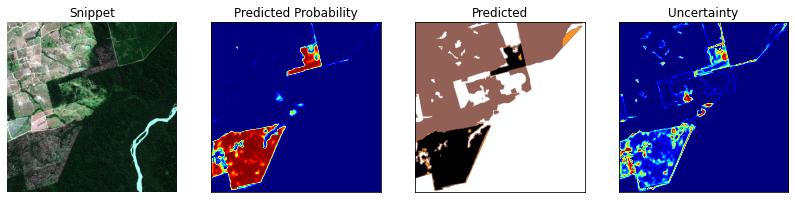

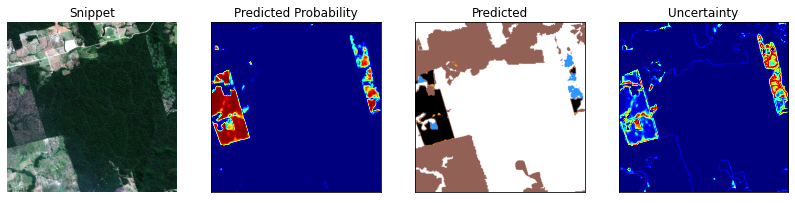

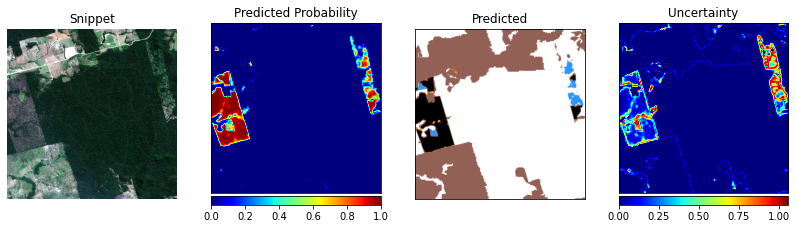

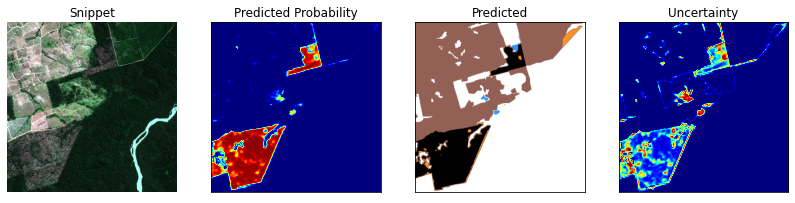

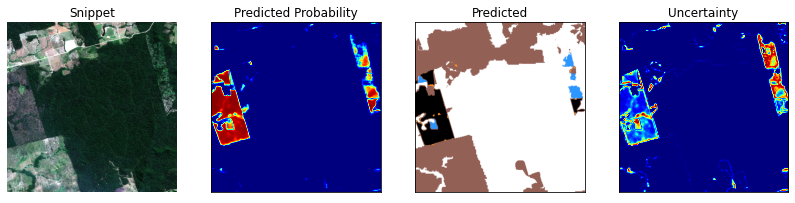

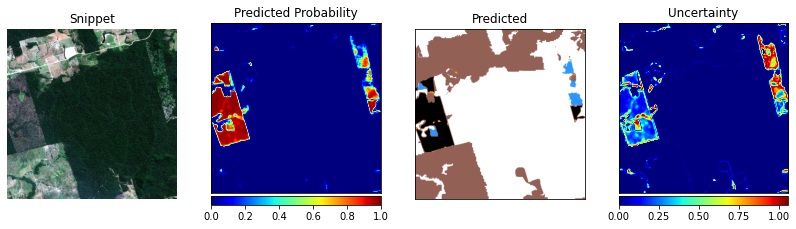

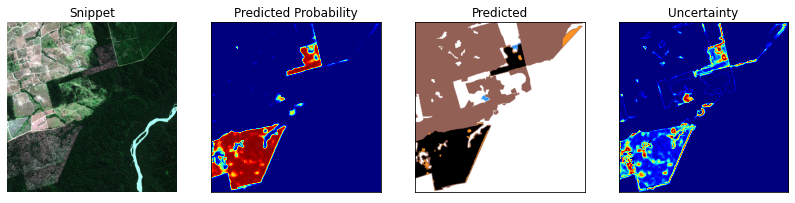

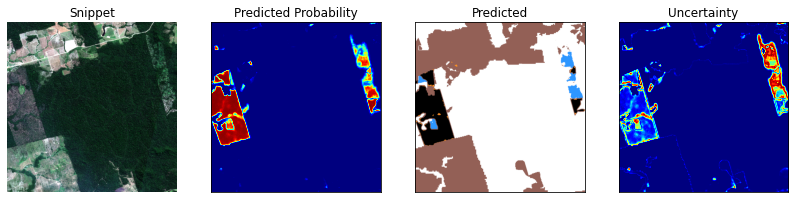

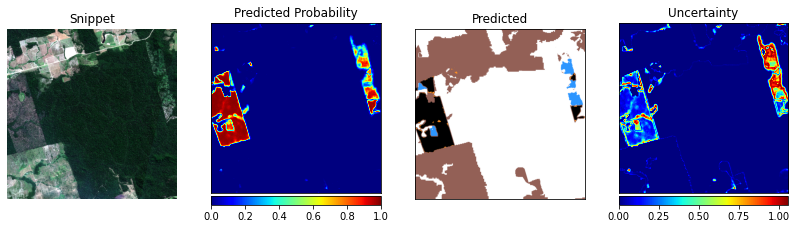

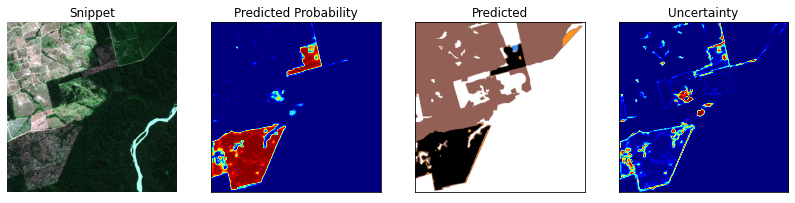

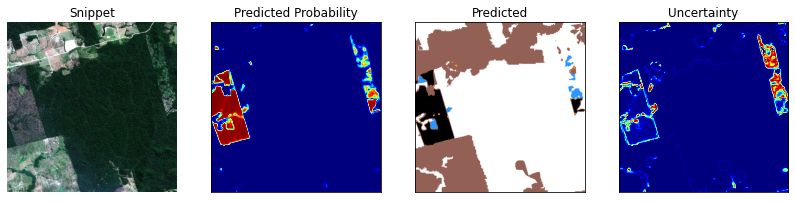

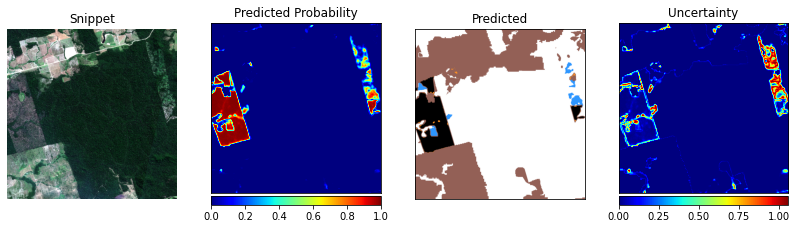

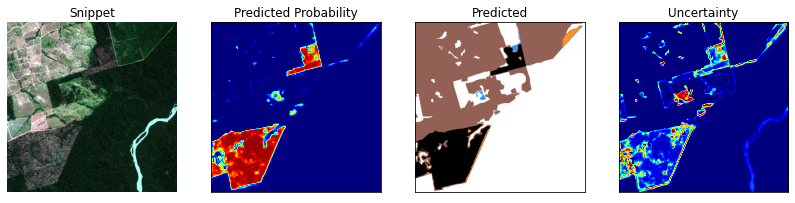

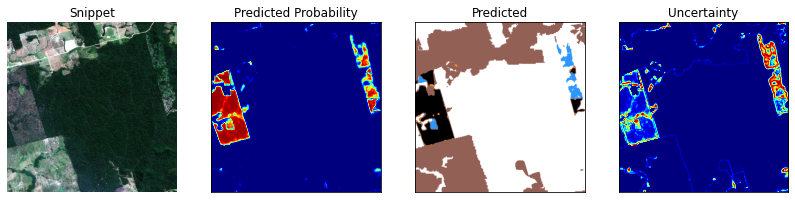

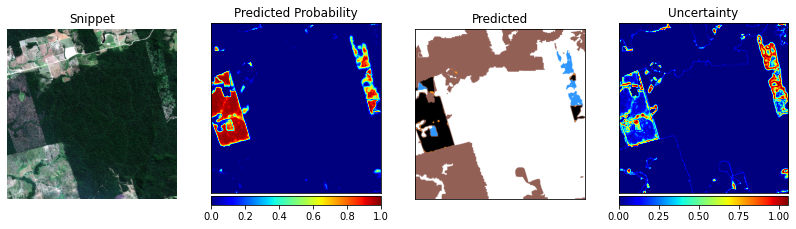

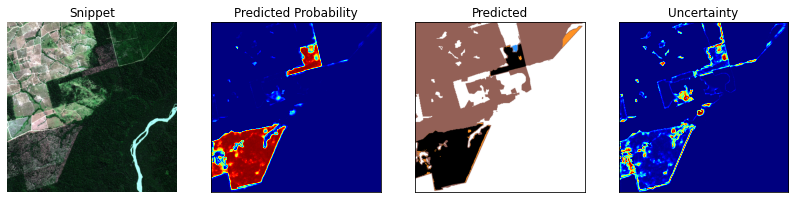

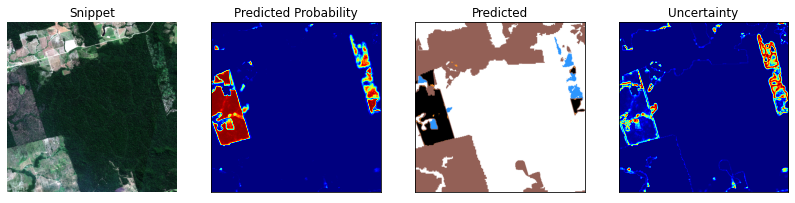

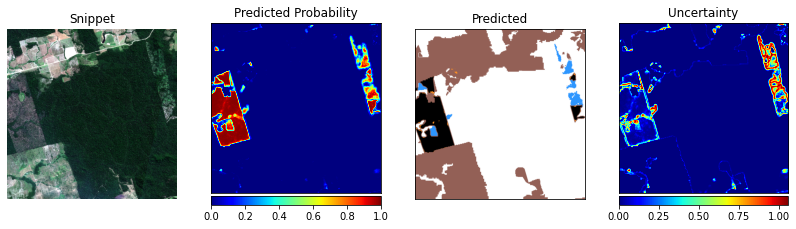

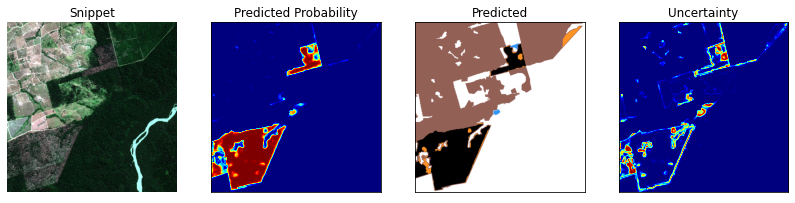

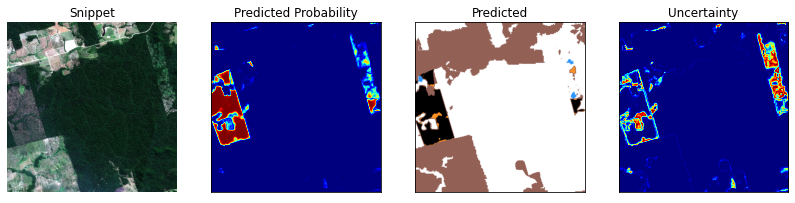

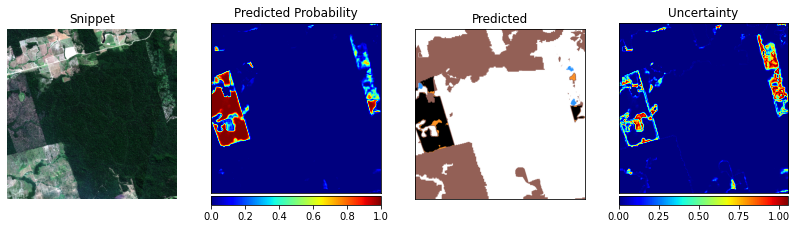

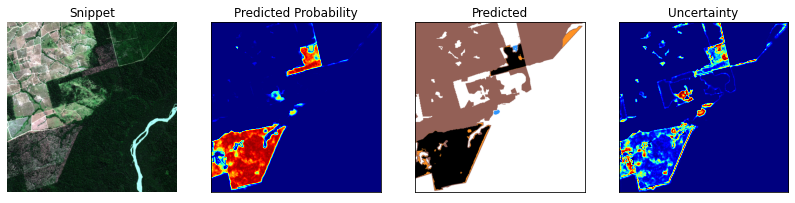

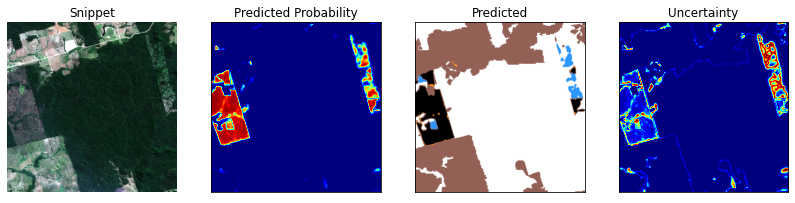

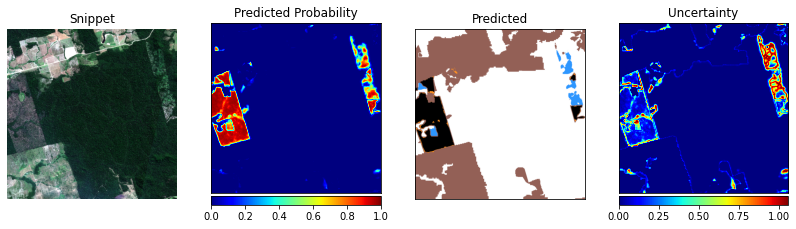

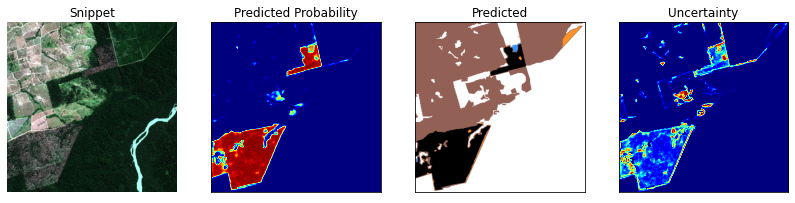

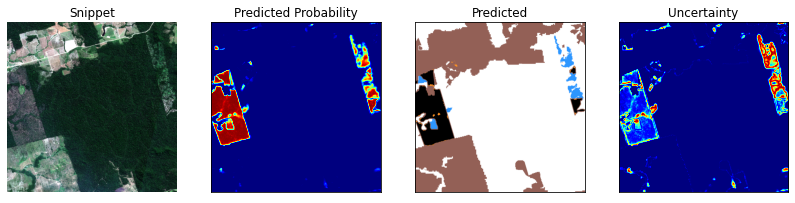

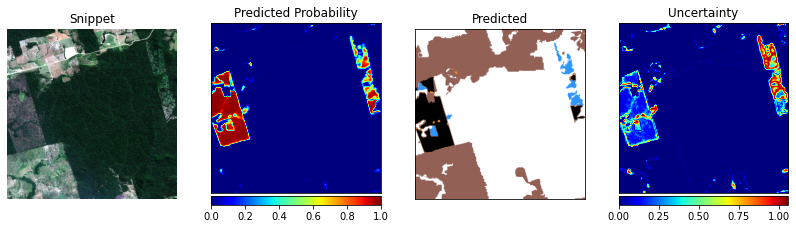

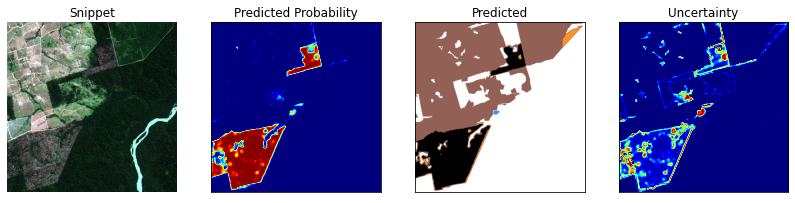

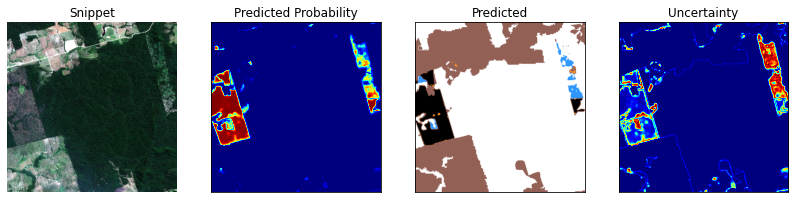

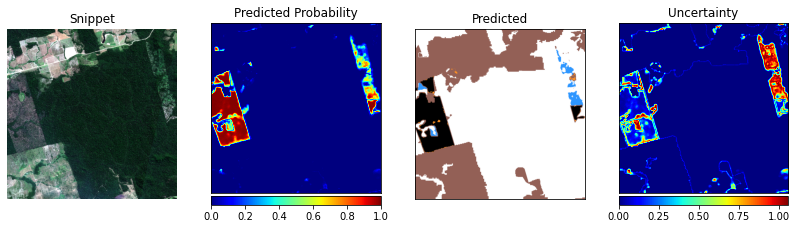

In [9]:
idx = 0
results = []
error_count = 0
while idx < len(exp_ids):
# for experiment_value, exp_id in zip(experiment_values, exp_ids):
    try:
        
        print("Beginning run number {}".format(idx))

        logger = Logger()
        trainer = trainer_class(config, dataset, patchesHandler, logger)

        trainer.defineExperiment(exp_ids[idx])

        trainer.setExperimentPath()
        trainer.createLogFolders()

        trainer.loadDataset()

        # %%
        if config["training"] == True:
            trainer.run()

        # %%
        result = trainer.run_predictor()
        print("Result idx {}: {}".format(idx, result))
        results.append(result)


        with open(trainer.default_log_name, 'wb') as f:
            pickle.dump(results, f)
        idx += 1
        print("Grid execution idx: {}".format(idx))
        error_count = 0
    except Exception as e: 
        print(traceback.format_exc())
        error_count += 1
        if error_count > 10:
            sys.exit()
        print("Execution error in idx {}. Retrying...".format(idx))
        continue

In [10]:
trainer.classes_mode

True

In [11]:
print(results)

[{'other_uncertainty_metrics': {'sUEO': 0.49182008453048304, 'ece_score': 0.02630996502432863}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.9979454e-01, 2.4829600e-07]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.3362616, 0.4554153]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.6659549 , 0.16695404]], dtype=float32)}, {'snippet_id': 0, 'coords': [800, 200], 'reference': 1, 'predicted': array([[0.01792965, 0.9783321 ]], dtype=float32)}, {'snippet_id': 1, 'coords': [550, 115], 'reference': 1, 'predicted': array([[0.41128865, 0.37413326]], dtype=float32)}, {'snippet_id': 1, 'coords': [430, 950], 'reference': 0, 'predicted': array([[0.10927758, 0.81579924]], dtype=float32)}], 'uncertainty_result': {'metrics': {'precision_L': array([0.98026492]), 'recall_L': array([0.92747533]), 'recall_Ltotal': array([0.56571275]), 'AA': array([

In [12]:
print(len(results))

10


In [13]:
results[9]

{'other_uncertainty_metrics': {'sUEO': 0.4144696951359452,
  'ece_score': 0.03141045592037575},
 'snippet_poi_results': [{'snippet_id': 0,
   'coords': [550, 550],
   'reference': 0,
   'predicted': array([[9.9997485e-01, 8.3934395e-08]], dtype=float32)},
  {'snippet_id': 0,
   'coords': [210, 610],
   'reference': 1,
   'predicted': array([[0.35121685, 0.4161476 ]], dtype=float32)},
  {'snippet_id': 0,
   'coords': [207, 617],
   'reference': 1,
   'predicted': array([[0.6875519 , 0.13750772]], dtype=float32)},
  {'snippet_id': 0,
   'coords': [800, 200],
   'reference': 1,
   'predicted': array([[0.01714078, 0.9828547 ]], dtype=float32)},
  {'snippet_id': 1,
   'coords': [550, 115],
   'reference': 1,
   'predicted': array([[0.30859083, 0.4561578 ]], dtype=float32)},
  {'snippet_id': 1,
   'coords': [430, 950],
   'reference': 0,
   'predicted': array([[0.12748416, 0.8649394 ]], dtype=float32)}],
 'uncertainty_result': {'metrics': {'precision_L': array([0.98648685]),
   'recall_L': a

In [14]:
trainer.f1

85.93

In [15]:
print(trainer.f1)

85.93


In [16]:
sys.exit()

SystemExit: 

c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\IPython\core\interactiveshell.py:3405: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
